<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-for-Finance-(2nd-ed.)" data-toc-modified-id="Python-for-Finance-(2nd-ed.)-1"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">金融 Python（第 2 版）</font></font></a></span></li><li><span><a href="#Trading-Strategies-(b)" data-toc-modified-id="Trading-Strategies-(b)-2"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">交易策略 (b) </font></font></a></span></li><li><span><a href="#Linear-OLS-Regression" data-toc-modified-id="Linear-OLS-Regression-3"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">线性 OLS 回归</font></font></a></span><ul class="toc-item"><li><span><a href="#The-Data" data-toc-modified-id="The-Data-3.1"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">数据</font></font></a></span></li><li><span><a href="#Regression" data-toc-modified-id="Regression-3.2">Regression</a></span></li></ul></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-4">Clustering</a></span></li><li><span><a href="#Frequency-Approach" data-toc-modified-id="Frequency-Approach-5">Frequency Approach</a></span></li><li><span><a href="#Classification-Algorithms" data-toc-modified-id="Classification-Algorithms-6">Classification Algorithms</a></span><ul class="toc-item"><li><span><a href="#Sequential-Train-Test-Split" data-toc-modified-id="Sequential-Train-Test-Split-6.1">Sequential Train-Test Split</a></span></li><li><span><a href="#Randomized-Train-Test-Split" data-toc-modified-id="Randomized-Train-Test-Split-6.2">Randomized Train-Test Split</a></span></li></ul></li><li><span><a href="#Deep-Neural-Network" data-toc-modified-id="Deep-Neural-Network-7">Deep Neural Network</a></span><ul class="toc-item"><li><span><a href="#DNN-with-scikit-learn" data-toc-modified-id="DNN-with-scikit-learn-7.1">DNN with scikit-learn</a></span></li><li><span><a href="#DNN-with-Keras-&amp;-TensorFlow-Backend" data-toc-modified-id="DNN-with-Keras-&amp;-TensorFlow-Backend-7.2">DNN with Keras &amp; TensorFlow Backend</a></span></li></ul></li></ul></div>

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Trading Strategies (b)

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt
import warnings

In [2]:
warnings.simplefilter('ignore')
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
np.random.seed(1000)
%matplotlib inline

# Linear OLS Regression

## 最小二乘法

## The Data

In [3]:
raw = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True).dropna()

KeyboardInterrupt: 

In [3]:
raw = pd.read_csv('./source/tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True).dropna()

## 数据里面已经去除掉周六日的NaN值了，但是因为美国(各国都有)自己的节日，所以在法定节假日(非周六日)的时候，股市会休市，股价和基于股价的基金的价格就会出现NaN值，但是汇市不会，汇市是除了周六日，一年都有交易，所以在数据里面存在汇市有数据，但是股市没有数据的情况，实际上如果是不需要考虑股市情况，单纯计算(取出)汇率的价值，是不需要做dropna的，但是股市相关的需要做来去除NaN值。

In [4]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [5]:
raw.columns

Index(['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N', 'SPY', '.SPX', '.VIX',
       'EUR=', 'XAU=', 'GDX', 'GLD'],
      dtype='object')

In [6]:
symbol = 'EUR='

## 取出的是欧元对美元的汇率EUR=，因为美元是国际货币，所以通常是用美元作为汇率的兑换方，1.4411就是1欧元等于1.4411美元。
## 汇率市场通常是无法做出高回报率的，相比股市(除非加杠杆)，因为波动不会特别大，而且要考虑同一时间买卖不同的汇率(银行会从中收取差价)和手续费。

In [7]:
data = pd.DataFrame(raw[symbol])

In [8]:
data['returns'] = np.log(data / data.shift(1))

In [9]:
data.dropna(inplace=True)

In [10]:
data['direction'] = np.sign(data['returns']).astype(int)

In [11]:
data.head()

,EUR=,returns,direction
Date,,,
2010-01-05,1.4368,-0.002988,-1
2010-01-06,1.4412,0.003058,1
2010-01-07,1.4318,-0.006544,-1
2010-01-08,1.4412,0.006544,1
2010-01-11,1.4513,0.006984,1


## returns是连续时间的报酬率log(使用dropna将第一个值的NaN给drop掉了),
## direction是returns的指向，亏了就是-1，获利就是1. np.sign就是将正负号提取出来(通过-1, 0和1的表达形式)，.astype(int)是更改数字的显示，将float(-1.0, 0.0, 1.0)改成int(-1, 0, 1)。

In [12]:
data['direction'].value_counts()

 1    1076
-1    1052
 0       9
Name: direction, dtype: int64

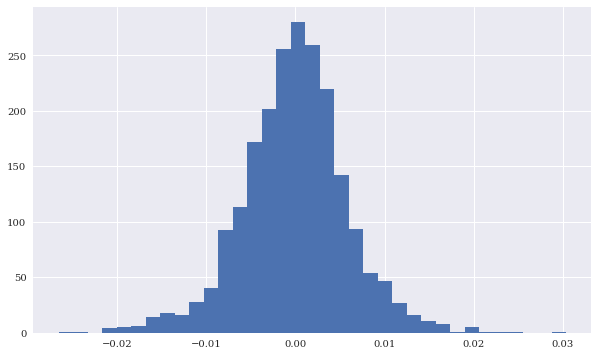

In [13]:
data['returns'].hist(bins = 35, figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_ml_01.png')

## 从图中看出，returns大体上是符合正态分布，mean应该是在0左右，但是不在0处(偏左)，正负的频率基本上一致，厚尾尖峰。

In [14]:
lags = 2

In [15]:
def create_lags(data):
    global cols
    cols = []
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)

In [16]:
create_lags(data)

In [17]:
data.head()

,EUR=,returns,direction,lag_1,lag_2
Date,,,,,
2010-01-05,1.4368,-0.002988,-1,NaN,NaN
2010-01-06,1.4412,0.003058,1,-0.002988,NaN
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544


In [18]:
cols.append('666')
cols

['lag_1', 'lag_2', '666']

## 局部变量↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [19]:
def ran(d):
    co = []
    for i in range(5):
        coi = d + i
        co.append(coi)

In [20]:
ran(10)

In [21]:
co

NameError: name 'co' is not defined

## global cols是让cols这个变量能够在这个notebooks的页面里面随意更改/引用和显示，通过这个语句可以将局部变量变成全局变量。
## 局部变量仅仅在def的函数里面可以使用，就像通常情况下定义的for i in range()里面的i，在函数里面使用就足够，不需要在函数外面使用，是临时的变量，一般以数字为主。
## 而全局变量一般以表格list，numpy.array, dataframe和dict字典为主，在循环过程中不断增加内容，最后取出的结果可以进一步拿出来使用。只需要做一次global cols的定义就行了，后面删掉之后不影响在函数外的调出和更改。
## 将报酬率延后一期和两期，对比当期和延后的returns值。

In [22]:
data.dropna(inplace=True)

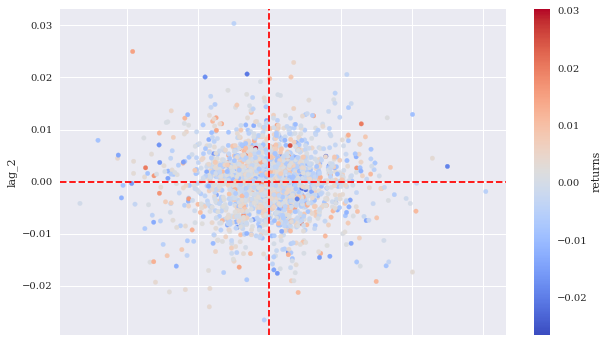

In [23]:
data.plot.scatter(x='lag_1', y='lag_2', c='returns', 
                  cmap='coolwarm', figsize=(10, 6), colorbar=True)
plt.axvline(0, c='r', ls='--')
plt.axhline(0, c='r', ls='--');
# plt.savefig('../../images/ch15/strat_ml_02.png');

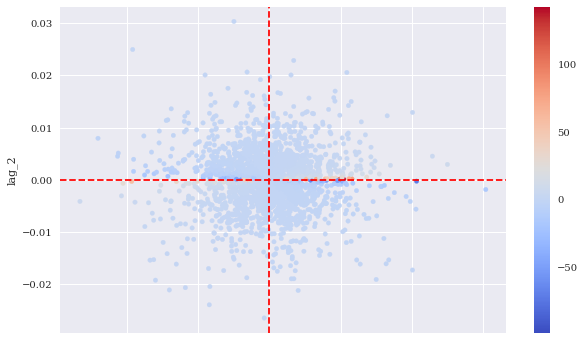

In [24]:
data.plot.scatter(x='lag_1', y='lag_2', c = data['lag_1']/data['lag_2'], 
                  cmap='coolwarm', figsize=(10, 6), colorbar=True)
plt.axvline(0, c='r', ls='--')
plt.axhline(0, c='r', ls='--');
# plt.savefig('../../images/ch15/strat_ml_02.png')

## 可以直接使用data.plot.scatter，对data里面的数据进行画图，需要表明x,y和c的值，命名是列名(要加"), 画出点图的x, y轴和colorbar的名称都是和columns的名称一致。
## 得出4个象限都有分布点，而且面积差不多，相当于是对原点对称了。

## Regression

## 用skcit-learn来做回归
## 这个和之前做的蒙地卡罗模拟的目标是一致的，这个是通过回归拟合，做出一个多空模型。

In [25]:
from sklearn.linear_model import LinearRegression  

In [26]:
model = LinearRegression()  

In [27]:
cols.remove('666')

In [28]:
cols

['lag_1', 'lag_2']

In [29]:
data['pos_ols_1'] = model.fit(data[cols], data['returns']).predict(data[cols])  

In [30]:
data['pos_ols_2'] = model.fit(data[cols], data['direction']).predict(data[cols])  

## model.fit(解释变数x，被解释变数y).predict(data[cols])带入求出predict的值。(data[cols]里面有2个variables，这个过程相当于是将两个变量变成了x1, x2; 结果都returns是一个数, 就是y).
## y值一个是returns，一个是direction。

In [31]:
data[['pos_ols_1', 'pos_ols_2']].head()

,pos_ols_1,pos_ols_2
Date,,
2010-01-07,-0.000166,-0.000086
2010-01-08,0.000017,0.040404
2010-01-11,-0.000244,-0.011756
2010-01-12,-0.000139,-0.043398
2010-01-13,-0.000022,0.002237


In [32]:
data[['pos_ols_1', 'pos_ols_2']] = np.where(data[['pos_ols_1', 'pos_ols_2']] > 0, 1, -1)  

## 通过where将数字简化为-1， 0， 1——>方便判断

In [33]:
data['pos_ols_1'].value_counts()  

-1    1847
 1     288
Name: pos_ols_1, dtype: int64

In [34]:
data['pos_ols_2'].value_counts()  

 1    1377
-1     758
Name: pos_ols_2, dtype: int64

## 两个y值(被解释变数)returns和基于returns的directions得出的两个一定程度上相反的多空组合策略，一个是多头多于空头，一个是空头多于多头。
## 将时间拉长(在短期可能无法做到策略相反，但是都能够盈利，但是长期可以，主要是hedge的工作，根据客户所需要的期间内来做hedge，从而保证在一定期间内，可以做到对冲)，这种交易部位相反的策略，如果能够确保形成的策略的数学模型过程中没有问题，同时都能够盈利的情况下，可以使用这种策略来做到低风险投资(类似于hedge fund对冲基金，通过套期保值（Hedging）避免損失)，这种资产也是基金在市场中希望找到的。
## 两边策略同时做相同金额的投资，会有比较多的时间是空手的状态(没有融券做空，也没有持有股票)，这种情况下可以保证股票的收益是在一个稳定的水平，比较安全。

In [35]:
pd.crosstab(data['pos_ols_1'], data['pos_ols_2'], rownames = ['pos_ols_1'], colnames = ['pos_ols_2'])

pos_ols_2,-1,1
pos_ols_1,,
-1,732,1115
1,26,262


## 做成统计表的形式，前面的是y轴的值，后面的是x轴的值，统计在(1, 1), (-1, -1), (1, -1), (-1, 1)4种情况下的出现次数。、
## 可以看出第一个ols1在做空的情况下, 第二个ols2在做多（1115）。部位相反的情况还是很多的，适合用来做hedge，有1115 + 26，超过一半的情况下会出现空手。

In [36]:
(data['pos_ols_1'].diff() != 0).sum()  

555

In [37]:
(data['pos_ols_2'].diff() != 0).sum()  

762

In [38]:
data['pos_ols_1'].diff()

Date
2010-01-07    NaN
2010-01-08    2.0
2010-01-11   -2.0
2010-01-12    0.0
2010-01-13    0.0
             ... 
2018-06-25    0.0
2018-06-26    0.0
2018-06-27    2.0
2018-06-28   -2.0
2018-06-29    0.0
Name: pos_ols_1, Length: 2135, dtype: float64

## .diff()是同一栏当前值和shift1的值相加， != 0是不等于0的情况，.sum() 加总次数。

In [39]:
data['strat_ols_1'] = data['pos_ols_1'] * data['returns']

In [40]:
data['strat_ols_2'] = data['pos_ols_2'] * data['returns']

## 策略乘上报酬率，得到策略的收益率。但是实际上是无法实施的，因为这个策略是基于lag的延后，所以在要决定交易策略的当下是没有办法确定策略的。这是信息中的adaptated适配性的需求，简单说就是决策只能基于现在时点上已知的信息进行，不能用未来的信息来做当下的决策。
## 所以实际上可以通过隔天的returns做多空策略，避免掉lag的情况。

In [41]:
data.head()

,EUR=,returns,direction,lag_1,lag_2,pos_ols_1,pos_ols_2,strat_ols_1,strat_ols_2
Date,,,,,,,,,
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988,-1,-1,0.006544,0.006544
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058,1,1,0.006544,0.006544
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544,-1,-1,-0.006984,-0.006984
2010-01-12,1.4494,-0.001310,-1,0.006984,0.006544,-1,-1,0.001310,0.001310
2010-01-13,1.4510,0.001103,1,-0.001310,0.006984,-1,1,-0.001103,0.001103


In [42]:
data[['returns', 'strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)

returns        0.810644
strat_ols_1    0.942422
strat_ols_2    1.339286
dtype: float64

## 加总后看到，returns是赔钱的(小于1)，策略1也是赔钱的，但是要比没有策略下亏的少，策略2是是赚钱的，如果同时持有1和2两种策略，收益没有全部使用策略2，但是对半持有，收益会更加平稳。

In [43]:
data[['returns', 'strat_ols_1', 'strat_ols_2']].std() * np.sqrt(252)

returns        0.094183
strat_ols_1    0.094195
strat_ols_2    0.094171
dtype: float64

## 从标准差看出，3个的标准差是一致，对于策略，专门做多和多空的波动率应该是一致的(相当于是加负号)，前提是returns基本上符合正态分布。
## 如果数据符合IID，独立同分布，这样日mean和标准差就存在相加关系，通过累加可以获得年标准差和mean.

In [44]:
(data['direction'] == data['pos_ols_1']).value_counts()  

False    1093
True     1042
dtype: int64

In [45]:
(data['direction'] == data['pos_ols_2']).value_counts()  

True     1096
False    1039
dtype: int64

## data['direction']是returns的正负号，data['pos_ols_1']是看策略的正负号，就是看策略里面预测的涨跌情况和实际上的涨跌是否一致。
## 结果是一半50%

In [46]:
(data['direction'] == data['pos_ols_2']).mean()

0.5133489461358314

In [47]:
(data['direction'] == data['pos_ols_1']).mean()

0.48805620608899297

## 预测成功率更高的策略(策略2)的收益更高。但是都比returns本身高，因为returns不存在预测，所以对于所有的盈亏都是乘以1(相当于是永远做多)。

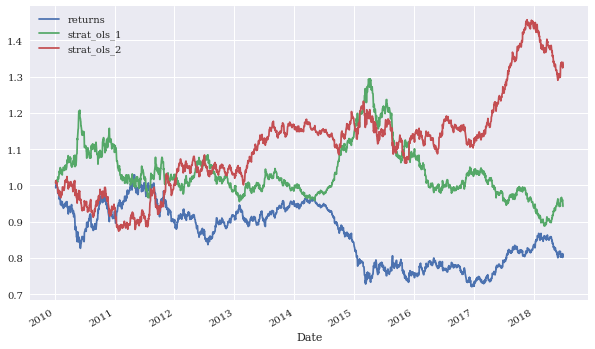

In [48]:
data[['returns', 'strat_ols_1', 'strat_ols_2']].cumsum().apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_ml_03.png');

## .cumsum()是做累计，基于连续利率的可加性，所以如果股价基本上是上升的，折线应该是向上的。.apply(np.exp)是将结果做指数，求出当时时间的累加收益
## 从图上看出returns的曲线整体上走低，少有回升，但是两个策略都一定程度上在下降的时候做空股票来获利，策略1是多数情况做空，策略2是少数情况做空，但是做多的时候基本上都和股价returns为正的时候一致，所以获得累计收益高，是3条线里面，唯一一个最后股价到达1以上的情况。

In [49]:
data['combine'] = (data['strat_ols_1'] + data['strat_ols_2'])/2

In [50]:
data.head()

,EUR=,returns,direction,lag_1,lag_2,pos_ols_1,pos_ols_2,strat_ols_1,strat_ols_2,combine
Date,,,,,,,,,,
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988,-1,-1,0.006544,0.006544,0.006544
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058,1,1,0.006544,0.006544,0.006544
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544,-1,-1,-0.006984,-0.006984,-0.006984
2010-01-12,1.4494,-0.001310,-1,0.006984,0.006544,-1,-1,0.001310,0.001310,0.001310
2010-01-13,1.4510,0.001103,1,-0.001310,0.006984,-1,1,-0.001103,0.001103,0.000000


In [51]:
data[['returns', 'strat_ols_1', 'strat_ols_2', 'combine']].sum().apply(np.exp)

returns        0.810644
strat_ols_1    0.942422
strat_ols_2    1.339286
combine        1.123465
dtype: float64

In [52]:
data[['returns', 'strat_ols_1', 'strat_ols_2', 'combine']].std() * np.sqrt(252)

returns        0.094183
strat_ols_1    0.094195
strat_ols_2    0.094171
combine        0.068067
dtype: float64

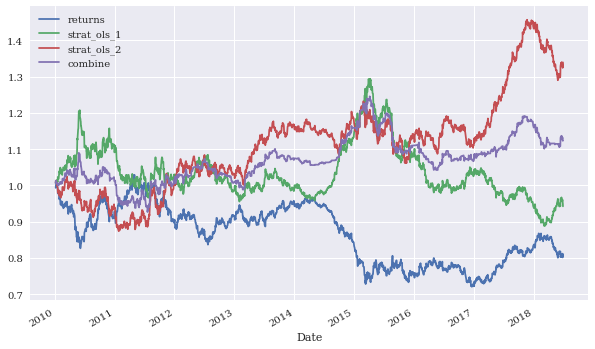

In [53]:
data[['returns', 'strat_ols_1', 'strat_ols_2', 'combine']].cumsum().apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_ml_03.png');

## 将两种策略的收益结合，两种策略各投资一半的钱，这样总的收益里面的比重就是0.5/0.5。
## 看结果，从mean上看，平均收益(也代表总收益)上，combine是低于第2个策略的，但高于returns和第一个策略，因为是两个策略的结合。但是从std标准差上看，的确combine的波动率远远低于策略1/2和returns。
## 低于returns是因为股票本身的收益会有起伏，但是完美的收益策略是可以做到通过做空来避免亏损给收益带来的波动，如果都是收益，自然波动率就小了(只剩下收益额之间的波动率，相比正负带来的波动还是要小很多)。上面的hedge的方法，并不是完美的策略，而是通过增加空手的时间(多空份额一致，从而相互抵消)来减少正负带来的波动。
## 这就是hedge的意义，通过不同交易部位的策略的配比来减少收益的波动。从折线图里面看，的确相比策略1/2，combine的折线更加平缓，维持在相对较高的水平(4条线里面第2)。

# Clustering

## 分群是非监督学习，意思是说没有绝对正确的答案，也没有最终需要预测出来的值(y值/returns)，只是将数据点分成规定的群数(依据的是数据本身内部的不同)，使用的方法是kmean。

In [54]:
from sklearn.cluster import KMeans

In [55]:
model = KMeans(n_clusters = 2, random_state = 0, tol= 0.0001, verbose= 0, 
               precompute_distances= 'auto',algorithm='auto', copy_x = True)  #  <1>

In [56]:
model.fit(data[cols])

KMeans(n_clusters=2, precompute_distances='auto', random_state=0)

In [57]:
KMeans?

## 输入的是lag1和lag2, 结果是需要分两群，一群代表0，预测第2天会亏损，会做空获利；一群代表1，预测第2天会盈利，会做多获利。这个过程没有使用returns值作为参照(监督)，所以分出的类别也是数据内部的差异分隔出的结果。
## random_state=0是因为kmeans是做了10次取最好，每次都会随机选一个作为起始值，定为0，可以保证最后的结果都是相同的(和取乱数的random seed一致的思路)。
## 现在的model里面已经包含了可以用来预测的模型，但是无法打印出模型的形式。

In [58]:
print(model)

KMeans(n_clusters=2, precompute_distances='auto', random_state=0)


In [59]:
data['pos_clus'] = model.predict(data[cols])

In [60]:
data

,EUR=,returns,direction,lag_1,lag_2,pos_ols_1,pos_ols_2,strat_ols_1,strat_ols_2,combine,pos_clus
Date,,,,,,,,,,,
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988,-1,-1,0.006544,0.006544,0.006544,0
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058,1,1,0.006544,0.006544,0.006544,1
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544,-1,-1,-0.006984,-0.006984,-0.006984,0
2010-01-12,1.4494,-0.001310,-1,0.006984,0.006544,-1,-1,0.001310,0.001310,0.001310,0
2010-01-13,1.4510,0.001103,1,-0.001310,0.006984,-1,1,-0.001103,0.001103,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,1.1702,0.004024,1,0.004644,0.002676,-1,-1,-0.004024,-0.004024,-0.004024,0
2018-06-26,1.1645,-0.004883,-1,0.004024,0.004644,-1,-1,0.004883,0.004883,0.004883,1
2018-06-27,1.1552,-0.008018,-1,-0.004883,0.004024,1,1,-0.008018,-0.008018,-0.008018,1


In [61]:
pd.crosstab(data['direction'], data['pos_clus'], rownames = ['direction'], colnames = ['pos_clus'])

pos_clus,0,1
direction,,
-1,579,472
0,5,4
1,576,499


In [62]:
data['pos_clus'] = np.where(data['pos_clus'] == 1, 1, -1)  

In [63]:
data.head()

,EUR=,returns,direction,lag_1,lag_2,pos_ols_1,pos_ols_2,strat_ols_1,strat_ols_2,combine,pos_clus
Date,,,,,,,,,,,
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988,-1,-1,0.006544,0.006544,0.006544,-1
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058,1,1,0.006544,0.006544,0.006544,1
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544,-1,-1,-0.006984,-0.006984,-0.006984,-1
2010-01-12,1.4494,-0.001310,-1,0.006984,0.006544,-1,-1,0.001310,0.001310,0.001310,-1
2010-01-13,1.4510,0.001103,1,-0.001310,0.006984,-1,1,-0.001103,0.001103,0.000000,1


## 将kmean模型带入data[cols]的值，结果是按照01分布的，结合之前做的策略1/2的情况可以得出大致01对应的-1/1的情况，通过np.where(data['pos_clus'] == 1, 1, -1)将1改成1，将0改成-1。
## crosstab可以用来做统计分析，如果需要更加科学(非直观看出来)的方式确定分类结果01和涨跌的对应关系，可以使用这个进行统计，所以得到0大部分是跌的，1大部分是涨的。
## 从另外一个方面，可以看出整体上的预测准确率也很低，1和0里面都混有较大部分的相反的情况。

In [64]:
data['pos_clus'].values

array([-1,  1, -1, ...,  1,  1, -1])

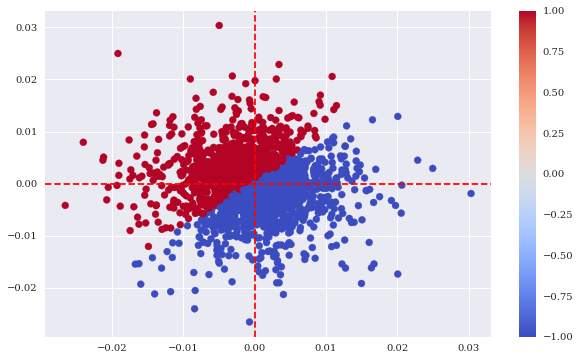

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(data['lag_1'], data[cols].iloc[:, 1],
            c=data['pos_clus'], cmap='coolwarm');
plt.colorbar()
plt.axvline(0, c='r', ls='--')
plt.axhline(0, c='r', ls='--');
# plt.savefig('../../images/ch15/strat_ml_04.png');

In [66]:
plt.scatter?

## data['lag_1'] = data[cols].iloc[:, 0]代表抓出lag的数据作为scatter的x和y轴值；c=data['pos_clus']将之前使用的returns值改为了pos_clus，代表cluster的分类结果，也是预测涨跌的结果，从红到蓝的colorbar的代表pos_clus的值是1红和-1蓝。
## plt.axvline(0, c='r', ls='--')和plt.axhline(0, c='r', ls='--')加上x = 0和y = 0两条线，从而标明原点，从图中看到，边界是明显从负负象限45度过原点到正正象限，可以看出在这两个象限上是红(1)和蓝(-1)点混杂(数量上基本对半)，这种大量混杂也导致预测准确率不高的一个原因。而在lag_1为负，而lag_2为正的情况下，基本上都是1(涨，做多)；在lag_1为正，而lag_2为负的情况下，基本上都是-1(跌，做空)。
## 在均线理论中，短期均线跌，但长期均线涨，会构成死亡交叉，预期会跌-1，要做空；长期均线跌，但短期均线涨，会构成黄金交叉，预期会涨1，要做多。(是均线的极端情况，一般是比大小，但是一正一负一涨一跌，可以清楚体现大小关系)。和上面的一致，说明均线理论在汇率市场也是广泛适用。
## 能够看到是在中间点集中，意味着更多的情况是点的坐标值在(0, 0)处浮动，lag_1和Lag_2都是接近于0的数，(0, 0)代表着通过汇率无获利和亏损的情况，代表着风险的平衡态(和returns是不一样的，returns是价格变化累加)，EUR = 代表着欧元兑美元的汇率，汇率是基于两个国家的经济状况，所以尽管有波动，但是mean reversion均值回归才是变动的基础，所以每日的收益会在0附近集中。
## 一般来说，这些客观的经济状况是无法在不长的时间改变的，所以汇率的具体数值就会在这个过程中涨涨跌跌，但是不会像股市一样有一个大致的趋势(存在更加潜在的趋势，需要将时间轴再拉长到100年，股票的生命周期一般是无法和一个国家的生命周期相比较)，所以一般发达国家(如欧盟)兑美元(因为美元是世界货币，所以交易的中介货币默认美元)的汇率是长期mean reversion均值回归到一个平均水平，除了像中国的国家，50年保持高速经济增长，中美之间的差距在以显著的速度拉近，所以在50年的时间轴上可以看出人民币相对美元升值的大趋势。

In [67]:
data['strat_clus'] = data['pos_clus'] * data['returns']

In [68]:
data[['returns', 'strat_clus']].sum().apply(np.exp)

returns       0.810644
strat_clus    1.269570
dtype: float64

In [69]:
data[['returns', 'strat_clus']].std() * np.sqrt(252)

returns       0.094183
strat_clus    0.094180
dtype: float64

In [70]:
(data['direction'] == data['pos_clus']).value_counts()

True     1078
False    1057
dtype: int64

In [71]:
(data['direction'] == data['pos_clus']).mean()

0.5049180327868853

## 上面的计算都是基于连续收益的可加性，从sum收益的角度看，strat_clus加总之后的盈亏是优于原始的returns，成功的扭亏为盈，使报酬率变成1.269570；而且策略的波动率(标准差)也低于原始汇率的波动率。.value_counts()计数，看有多少次预测成功，得出结果基本上到了0.505的准确率。说明虽然正确率不高，但是正确预测的情况下的获利要远远高于错误预测的情况，从而获得了较高的报酬率。

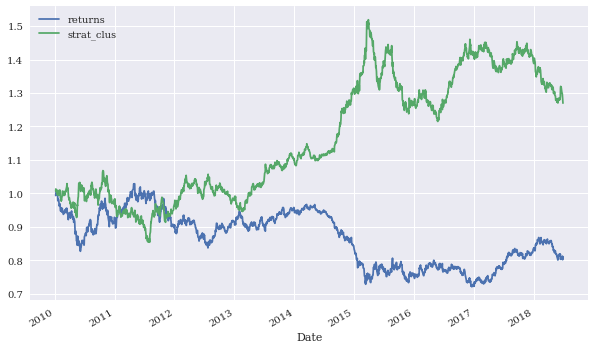

In [72]:
data[['returns', 'strat_clus']].cumsum().apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_ml_05.png');

## 画图看出基本上cluster是在returns出现重大下跌的情况下做空，成功预测出了较大变化幅度的几次变化，作对了策略，从而获得较高的收益。

# Frequency Approach

## 对lag_1和lag_2进行分类，对lag_1和lag_2里面的收益分类出涨和跌的报酬率，用0,1来代表，然后将分类后的lag_1和lag_2和基于returns正负的direction做分类, 嵌套表格。

In [73]:
def create_bins(data, bins=[0]):
    global cols_bin
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data[col_bin] = np.digitize(data[col], bins=bins)  
        cols_bin.append(col_bin)

In [74]:
np.digitize?

## 做了一个def函数，用来生成bins容器， bins=[0]，bin的list里面有一个元素0，global cols_bin是定义cols_bin为全域变量，= []开出空list。 同时进行两个生成，一个是在data的后面生成以lag_1_bin和lag_2_bin命名的两列数值；同时cols_bin.append(col_bin)生成lag_1_bin和lag_2_bin组成的栏名list。
## np.digitize(data[col], bins=bins)是分群函数，(需要分群的数据，分群的标准)，默认形式是right：False；order of bins：increasing；returned index `i` satisfies: ``bins[i-1] <= x < bins[i]``
## 简单说就是，对给出的区分标准，分出两类(因为只给了一个区分点)，一类是在点左边的(因为right为FALSE)，取点本身的值；一类是点右边的，取点+1的值(因为order of bin是增加，同时returned index的格式就是间隔变化为1)。所以就分为了两类: 0代表负数, 1代表正数。(因为取值默认是左闭右开的区间，所以0这个区分点本身是划在了1这一栏)
## 区分点的格式是[a, b], 这是有两个区分点的情况，如果只有一个，也要是[a].

In [75]:
create_bins(data)

In [76]:
data[cols_bin + ['direction']].head()  

,lag_1_bin,lag_2_bin,direction
Date,,,
2010-01-07,1,0,-1
2010-01-08,0,1,1
2010-01-11,1,0,1
2010-01-12,1,1,-1
2010-01-13,0,1,1


## lag_bin的1和0与direction的1和-1存在滞后1/2期的一致关系。

In [77]:
data[data['direction'] == 0].head()

,EUR=,returns,direction,lag_1,lag_2,pos_ols_1,pos_ols_2,strat_ols_1,strat_ols_2,combine,pos_clus,strat_clus,lag_1_bin,lag_2_bin
Date,,,,,,,,,,,,,,
2011-12-06,1.3401,0.0,0,-0.000075,-0.004541,-1,1,-0.0,0.0,0.0,-1,-0.0,0,0
2012-08-07,1.2400,0.0,0,0.001210,0.016691,1,-1,0.0,-0.0,0.0,1,0.0,1,1
2013-02-13,1.3453,0.0,0,0.003500,0.003213,-1,-1,-0.0,-0.0,-0.0,-1,-0.0,1,1
2013-02-22,1.3188,0.0,0,-0.006952,-0.007950,-1,1,-0.0,0.0,0.0,-1,-0.0,0,0
2013-10-01,1.3524,0.0,0,0.000222,0.002444,-1,1,-0.0,0.0,0.0,1,0.0,1,1


In [78]:
data.loc['2011-12-06': '2011-12-08']

,EUR=,returns,direction,lag_1,lag_2,pos_ols_1,pos_ols_2,strat_ols_1,strat_ols_2,combine,pos_clus,strat_clus,lag_1_bin,lag_2_bin
Date,,,,,,,,,,,,,,
2011-12-06,1.3401,0.000000,0,-0.000075,-0.004541,-1,1,-0.000000,0.000000,0.0,-1,-0.000000,0,0
2011-12-07,1.3412,0.000820,1,0.000000,-0.000075,-1,1,-0.000820,0.000820,0.0,-1,-0.000820,1,0
2011-12-08,1.3345,-0.005008,-1,0.000820,0.000000,-1,1,0.005008,-0.005008,0.0,-1,0.005008,1,1


## 12-06 ：direction = 0 -> 12-07：lag_1_bin = 1 -> 12-08：lag_2_bin = 1, lag的滞后性，同时验证了digitize的分类原则，左闭右开，0划在1这一类里面。

In [79]:
data.loc['2011-12-06': '2011-12-08'][cols_bin + ['direction']]

,lag_1_bin,lag_2_bin,direction
Date,,,
2011-12-06,0,0,0
2011-12-07,1,0,1
2011-12-08,1,1,-1


## 两个[]可以确定的截取出需要的栏和行交汇处的数据，cols_bin +说明[list + list] = list.

In [80]:
grouped = data.groupby(cols_bin + ['direction'])  
grouped.size()

lag_1_bin  lag_2_bin  direction
0          0          -1           239
                       0             4
                       1           258
           1          -1           262
                       1           288
1          0          -1           272
                       0             1
                       1           278
           1          -1           278
                       0             4
                       1           251
dtype: int64

In [81]:
grouped['lag_1_bin']

## data.groupby分群，(cols_bin + ['direction']分群的原则)，按照lag_1_bin，lag_2_bin和direction这3个栏里面的数值进行分类，等于是3层嵌套的统计模型，分群之后的结果是一个类似于dataframe(表格)的groupby文件，不能直接打印出来, 但是有些作对df的函数还是可以使用。
## 最后分群嵌套的嵌套顺序是按照输入栏名的顺序：cols_bin + ['direction']。
## 通过.size()统计出嵌套路径下各个值对应的出现频率/次数)，共有2 * 2 * 3 = 12种情况，
## 有一种情况在统计数据中没有出现过(0, 1, 0)，所以统计出的路径是12 - 1 = 11种。

In [82]:
res = grouped['direction'].size().unstack(fill_value=0)  

## grouped['direction'].size()是取出3层嵌套模型的第3层，当中包含有direction和前面嵌套路径的信息。.unstack(fill_value=0) 将数据摊平，前面的路径信息变成了行，direction的3个值变成了新的表格的3列1，0，-1. fill_value=0是因为嵌套格式摊平会带来行变列的工程中，并不是每一个路径下都存在1，0，-1这3栏对应的频数，正这里面实际上就是缺失了(0, 1, 0)这个路径对应的频数，针对不存在的值可以设定填充的数是0.

In [83]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]  

In [84]:
res.style.apply(highlight_max, axis=1)  

In [85]:
res.style?

## 设定函数highlight_max，这个函数放入的s值是df的形式(groupby)，is_max = s == s.max()是一个判定结果的集合is_max，看s值是否是s这个list里面的最大值。
##  if v else '' for v in is_max的意思是对于所有在is_max里面的v(顺序是和平常写的不一样，但是表达的意思一致，而且更加紧凑)，if v就是if v is True(这时候的is_max就是一个bool数列，而且里面除了最大值是True，其他都是False)。
## 结果两个方向，一个是为True的输出项(最大值)：在if前面的'background-color: yellow'；应该是为False的输出项(非最大值)：在else后跟着的''代表输出为空。
## 'background-color: yellow'是res.style能够适配使用的表达dict形式的语句，.apply是对于dataframe格式的数据做括号()里面的函数操作，放入之前定义好的函数名称，后面axis=1是应用沿着为1的轴(就是竖轴/y轴)，也就是按着一行一行来运行，每次对一行数据进行highlight_max的操作。

In [86]:
data['pos_freq'] = np.where(data[cols_bin].sum(axis=1) == 2, -1, 1)  

## 通过前面的Frequency Approach的统计方法，可以得出3个数据间的大致关系：
## (0, 0, 1),(0, 1, 1),(1, 0, 1)和(1, 1, 0), 从结果上看，除了连涨两天的情况做空，其他都做多。连涨两天，第3天跌也是汇率市场的特性(在经济状况不变的情况下)。
## ## 为了表述出连涨两天的情况，使用data[cols_bin].sum(axis=1) == 2的方法来判定，等于2就是连涨2天，要做空，赋值-1；其他情况就是做多，赋值1。.sum(axis=1)的加总是每一行加总一次，沿着1轴/y轴/竖轴。

In [87]:
(data['direction'] == data['pos_freq']).value_counts()

True     1102
False    1033
dtype: int64

In [88]:
(data['direction'] == data['pos_freq']).mean()

0.5161592505854801

## 看得出预测的结果还是比较准确，到了0.516

In [89]:
data['strat_freq'] = data['pos_freq'] * data['returns']

In [90]:
data[['returns', 'strat_freq']].sum().apply(np.exp)

returns       0.810644
strat_freq    0.989513
dtype: float64

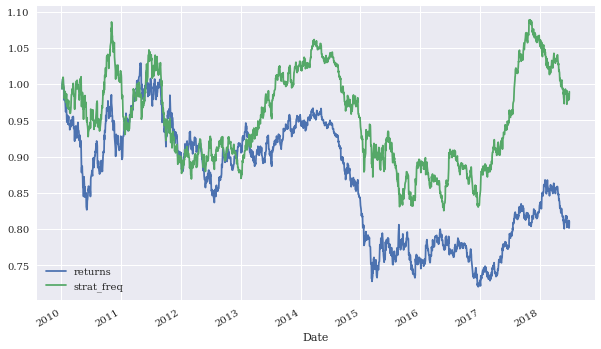

In [91]:
data[['returns', 'strat_freq']].cumsum().apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_ml_06.png');

## Frequency Approach的统计方法的报酬率虽然比原始returns要高，但是结果还是小于1(还是亏损的策略)，相比之下，前面的预测成功率更低的cluster却能够获得远远高于这个策略的报酬率，说明在预测准确率都较低时，预测准确率不能作为衡量预测方法的唯一标准，因为都预测的很差，但是如果在价格大涨大跌的时候预测准确就可以获得高额收益，但是如果是在变化幅度小时预测到了，实际上对于收益率的改善作用甚微。

# Classification Algorithms

In [92]:
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## 3个分类器linear_model, GaussianNB(Naive_Bayes高斯朴素贝叶斯)和SVC(support  vector machine支持向量机)。前两个是基础，表现也较差，但是可以作为分类算法的基准，所有进一步/高阶的算法需要以这个两个的表现作为比较基础。

## Two Binary Feature二元特征：选择lag_1和lag_2这两个落后一/两期的数据作为features。

## 在考虑到所有客观条件(手续费，推导过程严谨等)，能够在汇率市场上获得较高收益是相比股票市场要困难的多，但是相比股票市场，汇率市场存在均值回归的特点，同时外汇对于跨国企业来说是必不可少的，所以汇率市场也是一直交易不断。

In [93]:
C = 1

## 本章程序的问题是没有对数据分组，所以没有办法测试模型是否出现了overfitting的情况(模型为了能够完美穿过所有点，导致模型的参数都很大，严重偏离了正常的模型参数范围，在train set当中表现极好，但是到test set当中就表现极差)。
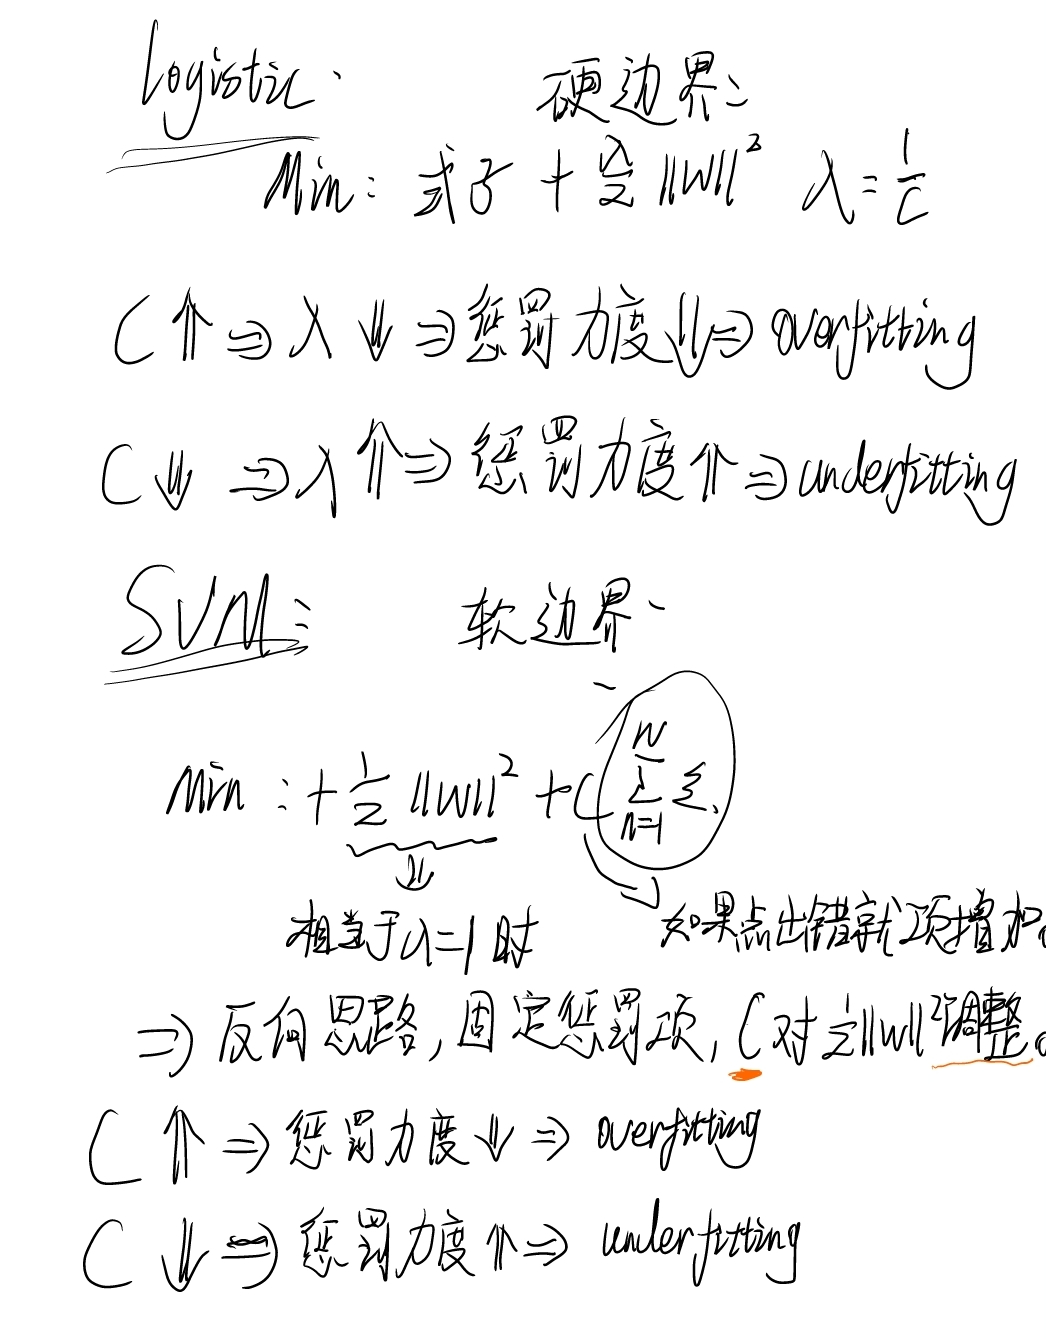
## 所以在这一节当中一些规则约束，对于SVM和log_reg, 两个模型当中都引入了C作为调整(第2个GaussianNB因为是采用了概率bayes估计，所以不需要正则化，通过先验的引入来避免nose噪声)。
## 对于log_reg来说，这种调整是采用了模型自带的Regularization正则化。1/3这两个模型预设的都是做L2Regularization，就是+ λ * ||w||^2 /2, 这里面的C就是相当于1/λ的作用，λ作为惩罚系数在模型里面起到约束参数变化的作用，C越大，惩罚项λ越小，约束力度越小，过拟合问题没有解决；反之C越小，惩罚项λ越大，约束力度越大，过拟合问题得到解决，但是可能会出现underfitting欠拟合的情况。

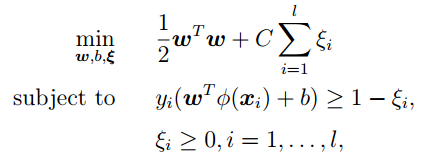

## 对于SVM来说，C值越大，分类器就越不愿意允许分类错误(“离群点”nose噪声)。当C趋于无穷大时，这个问题也就是不允许出现分类误差的样本存在，分类器就会竭尽全力地在训练数据上少犯错误，而实际上这是不可能/没有意义的，于是就造成过拟合，那这就是一个hard-margin问题(过拟合)；而C值过小时，分类器就会过于“不在乎”分类错误，于是分类性能就会较差。当C趋于0时，我们不再关注分类是否正确，只要求间隔越 大越好，那么我们将无法得到有意义的解且算法不会收敛。(欠拟合)。

In [94]:
models = {
    'log_reg': linear_model.LogisticRegression(C=C),
    'gauss_nb': GaussianNB(),
    'svm': SVC(C=C)
}

## 将函数模型的fitting过程用字典的方式写出来，每一个以模型名称命名的index后面都接着对应的模型的函数式和括号的参数。

In [95]:
def fit_models(data):  
    mfit = {model: models[model].fit(data[cols_bin], data['direction'])
            for model in models.keys()} 

## 设定一个专门用来fit models的程序fit_models，通过 for in的循环，将dictionary里面的index和对应的模型函数式，一个个导出，然后做fit，分类当中的3种方法都是监督式学习，所以需要data['direction']这个被解释变量/y值作为监督。
## 解释变量是data[cols_bin]，cols_bin是之前做bin相关的def的时候设定的全局变量，cols_bin就是lag_1_bin和lag_2_bin这两个值组成的list，将这两列截取出来是因为这两个bin代表了lag_1/2的正负情况，和'direction'对returns的作用一样。
## 两个输入项，一个是data，一个是之前设定好的models，上面的循环是做的简易版循环，在括号里面完成，但是通过models[model]和for model in models.keys()的结合, models.keys()获得models的index(keys)的值，然后用这个来做[]切片，导出对应的模型函数式。最后形成{}的dictionary形式，indexs/keys的值是models的名称，里面存储的从函数表达式变成了拟合出的带参数的模型本身，方便下面直接使用。

In [96]:
fit_models(data)

In [97]:
def derive_positions(data):  
    for model in models.keys():
        data['pos_' + model] = models[model].predict(data[cols_bin])

## 定义输入解释变数，然后predict出结果(多空策略)。每一个模型取出后做predict，()里面输入的解释变数/x值就是data [cols_bin] (之前用来拟合模型)。data['pos_' + model]将预测出的结果加在data这个dataframe后面，以'pos_' + model的形式(pos_log_reg/pos_gauss_nb/pos_svm)。
## 前面的fit_models的结果实际上已经输出了，只不过作为模型形式保存在内存里面，所以后面接着只要是通过模型预测的函数，电脑就会找到之前fit的同名模型，对这个模型进行predict的处理。
## models[model].predict就是SVC(C=C).predict(data[cols_bin]).

In [98]:
derive_positions(data)

In [99]:
data

,EUR=,returns,direction,lag_1,lag_2,pos_ols_1,pos_ols_2,strat_ols_1,strat_ols_2,combine,pos_clus,strat_clus,lag_1_bin,lag_2_bin,pos_freq,strat_freq,pos_log_reg,pos_gauss_nb,pos_svm
Date,,,,,,,,,,,,,,,,,,,
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988,-1,-1,0.006544,0.006544,0.006544,-1,0.006544,1,0,1,-0.006544,-1,-1,1
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058,1,1,0.006544,0.006544,0.006544,1,0.006544,0,1,1,0.006544,1,1,1
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544,-1,-1,-0.006984,-0.006984,-0.006984,-1,-0.006984,1,0,1,0.006984,-1,-1,1
2010-01-12,1.4494,-0.001310,-1,0.006984,0.006544,-1,-1,0.001310,0.001310,0.001310,-1,0.001310,1,1,-1,0.001310,-1,-1,-1
2010-01-13,1.4510,0.001103,1,-0.001310,0.006984,-1,1,-0.001103,0.001103,0.000000,1,0.001103,0,1,1,0.001103,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,1.1702,0.004024,1,0.004644,0.002676,-1,-1,-0.004024,-0.004024,-0.004024,-1,-0.004024,1,1,-1,-0.004024,-1,-1,-1
2018-06-26,1.1645,-0.004883,-1,0.004024,0.004644,-1,-1,0.004883,0.004883,0.004883,1,-0.004883,1,1,-1,0.004883,-1,-1,-1
2018-06-27,1.1552,-0.008018,-1,-0.004883,0.004024,1,1,-0.008018,-0.008018,-0.008018,1,-0.008018,0,1,1,-0.008018,1,1,1


In [100]:
def evaluate_strats(data):  
    global sel
    sel = []
    for model in models.keys():
        col = 'strat' + model 
        data[col] = data['pos_' + model] * data['returns']
        sel.append(col)
    sel.insert(0, 'returns')

In [101]:
evaluate_strats(data)

## 上面的就是在定义函数evaluate_strats，global sel将sel设定为全局变量，依然是取出所有models的名称，然后组成新的list: sel[ 'strat_log_reg', 'strat_gauss_nb', 'strat_svm' ], data也添加了这3列的数值，将上个程序求得的多空策略乘以returns的值，算出这3个策略对应的报酬率，将这个报酬率的数值填入那3列当中。
## sel.insert(0, 'returns')是在sel的第一个/头的位置插入'returns'

In [102]:
sel.insert(1, 'strat_freq')

In [103]:
sel.remove('strat_freq')

In [104]:
sel

['returns', 'stratlog_reg', 'stratgauss_nb', 'stratsvm']

## 再在第2个的位置插入'strat_freq'(就是returns的后面)

In [105]:
data[sel].sum().apply(np.exp)  

returns          0.810644
stratlog_reg     1.243322
stratgauss_nb    1.243322
stratsvm         0.989513
dtype: float64

## 将所有之前运行过的方法形成的策略从data里面取出来，然后求累加后的连续时间报酬率，.apply(np.exp)指数开出来，得到的是5种方法的一年固定一次的间断时间报酬率。
## 获利最多的分别是strat_log_reg:1.243322；strat_gauss_nb:1.243322。

In [106]:
(data['direction'] == data['pos_log_reg']).mean()

0.5133489461358314

In [107]:
(data['direction'] == data['pos_gauss_nb']).mean()

0.5133489461358314

In [108]:
(data['direction'] == data['pos_svm']).mean()

0.5161592505854801

## 预测正确率还是很低(之前算的也都不高)，但是不影响最后报酬率远远高于原有的returns.

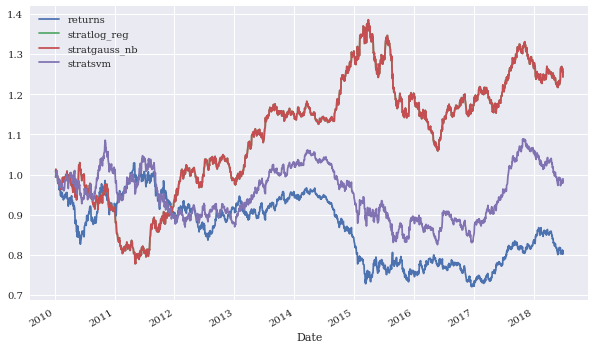

In [109]:
data[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_ml_07.png')

## 做累加折线图
## 看起来只有3条折线的原因：frequency和svm的结果基本上重合了；log_reg和gauss_nb的结果也重合了。

## Five Binary Features；之前使用的features分别是延后一期和两期的returns；而five binary是以延后1/2/3/4/5期的共5期数据作为features。

In [110]:
data = pd.DataFrame(raw[symbol])

In [111]:
data['returns'] = np.log(data / data.shift(1))

In [112]:
data['direction'] = np.sign(data['returns'])

## sign求正负号，-1, 0，1

In [113]:
data

,EUR=,returns,direction
Date,,,
2010-01-04,1.4411,NaN,NaN
2010-01-05,1.4368,-0.002988,-1.0
2010-01-06,1.4412,0.003058,1.0
2010-01-07,1.4318,-0.006544,-1.0
2010-01-08,1.4412,0.006544,1.0
...,...,...,...
2018-06-25,1.1702,0.004024,1.0
2018-06-26,1.1645,-0.004883,-1.0
2018-06-27,1.1552,-0.008018,-1.0


In [114]:
lags = 5  
create_lags(data)
data.dropna(inplace=True)
#def create_lags(data):
#    global cols
#    cols = []
#    for lag in range(1, lags + 1):
#        col = 'lag_{}'.format(lag)
#        data[col] = data['returns'].shift(lag)
#        cols.append(col)

In [115]:
create_bins(data)  
cols_bin
#def create_bins(data, bins=[0]):
#    global cols_bin
#    cols_bin = []
#    for col in cols:
#        col_bin = col + '_bin'
#        data[col_bin] = np.digitize(data[col], bins=bins)  
#        cols_bin.append(col_bin)

['lag_1_bin', 'lag_2_bin', 'lag_3_bin', 'lag_4_bin', 'lag_5_bin']

In [116]:
data

,EUR=,returns,direction,lag_1,lag_2,lag_3,lag_4,lag_5,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin
Date,,,,,,,,,,,,,
2010-01-12,1.4494,-0.001310,-1.0,0.006984,0.006544,-0.006544,0.003058,-0.002988,1,1,0,1,0
2010-01-13,1.4510,0.001103,1.0,-0.001310,0.006984,0.006544,-0.006544,0.003058,0,1,1,0,1
2010-01-14,1.4502,-0.000551,-1.0,0.001103,-0.001310,0.006984,0.006544,-0.006544,1,0,1,1,0
2010-01-15,1.4382,-0.008309,-1.0,-0.000551,0.001103,-0.001310,0.006984,0.006544,0,1,0,1,1
2010-01-19,1.4298,-0.005858,-1.0,-0.008309,-0.000551,0.001103,-0.001310,0.006984,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,1.1702,0.004024,1.0,0.004644,0.002676,-0.001555,-0.002930,0.001291,1,1,0,0,1
2018-06-26,1.1645,-0.004883,-1.0,0.004024,0.004644,0.002676,-0.001555,-0.002930,1,1,1,0,0
2018-06-27,1.1552,-0.008018,-1.0,-0.004883,0.004024,0.004644,0.002676,-0.001555,0,1,1,1,0


In [117]:
data[cols_bin].head()

,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin
Date,,,,,
2010-01-12,1,1,0,1,0
2010-01-13,0,1,1,0,1
2010-01-14,1,0,1,1,0
2010-01-15,0,1,0,1,1
2010-01-19,0,0,1,0,1


In [118]:
data.dropna(inplace=True)

In [119]:
fit_models(data)
#def fit_models(data):  
#    mfit = {model: models[model].fit(data[cols_bin], data['direction'])
#            for model in models.keys()} 

In [120]:
derive_positions(data)
#def derive_positions(data):  
#    for model in models.keys():
#        data['pos_' + model] = models[model].predict(data[cols_bin])

In [121]:
evaluate_strats(data)
#def evaluate_strats(data):  
#    global sel
#    sel = []
#    for model in models.keys():
#        col = 'strat' + model 
#        data[col] = data['pos_' + model] * data['returns']
#        sel.append(col)
#    sel.insert(0, 'returns')

In [122]:
data[sel].sum().apply(np.exp)

returns          0.805002
stratlog_reg     0.971623
stratgauss_nb    0.986420
stratsvm         2.649423
dtype: float64

In [123]:
data

,EUR=,returns,direction,lag_1,lag_2,lag_3,lag_4,lag_5,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin,pos_log_reg,pos_gauss_nb,pos_svm,stratlog_reg,stratgauss_nb,stratsvm
Date,,,,,,,,,,,,,,,,,,,
2010-01-12,1.4494,-0.001310,-1.0,0.006984,0.006544,-0.006544,0.003058,-0.002988,1,1,0,1,0,-1.0,-1.0,1.0,0.001310,0.001310,-0.001310
2010-01-13,1.4510,0.001103,1.0,-0.001310,0.006984,0.006544,-0.006544,0.003058,0,1,1,0,1,1.0,1.0,1.0,0.001103,0.001103,0.001103
2010-01-14,1.4502,-0.000551,-1.0,0.001103,-0.001310,0.006984,0.006544,-0.006544,1,0,1,1,0,-1.0,-1.0,-1.0,0.000551,0.000551,0.000551
2010-01-15,1.4382,-0.008309,-1.0,-0.000551,0.001103,-0.001310,0.006984,0.006544,0,1,0,1,1,1.0,1.0,1.0,-0.008309,-0.008309,-0.008309
2010-01-19,1.4298,-0.005858,-1.0,-0.008309,-0.000551,0.001103,-0.001310,0.006984,0,0,1,0,1,1.0,1.0,1.0,-0.005858,-0.005858,-0.005858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,1.1702,0.004024,1.0,0.004644,0.002676,-0.001555,-0.002930,0.001291,1,1,0,0,1,-1.0,-1.0,1.0,-0.004024,-0.004024,0.004024
2018-06-26,1.1645,-0.004883,-1.0,0.004024,0.004644,0.002676,-0.001555,-0.002930,1,1,1,0,0,-1.0,-1.0,-1.0,0.004883,0.004883,0.004883
2018-06-27,1.1552,-0.008018,-1.0,-0.004883,0.004024,0.004644,0.002676,-0.001555,0,1,1,1,0,-1.0,-1.0,1.0,0.008018,0.008018,-0.008018


## 结果上看，前两种的表现在features增加的情况下反而下降了，但是SVM在这个过程中显著增加了增加了。
## 所以看汇率市场，在考虑交易手续费的情况下，这些方法是会亏损(跑不赢通胀的)，但是汇率市场有好处：24小时市场，公平，以小博大(加杠杆的情况)。

In [124]:
(data['direction'] == data['pos_log_reg']).mean()

0.5093808630393997

In [125]:
(data['direction'] == data['pos_gauss_nb']).mean()

0.5089118198874296

In [126]:
(data['direction'] == data['pos_svm']).mean()

0.5469043151969981

## 之前2features时，在预测成功率上，SVM没有明显领先于其他两个models，所以算报酬率上也没有明显差距，但是features增加，SVM的准确率明显增加，同时带来报酬率上的明显增加。

In [127]:
0.004221388367729831 == 0.004221388367729831

True

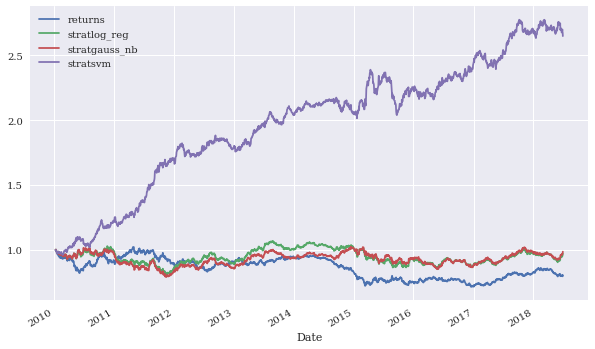

In [128]:
data[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_ml_08.png');

## Five Digitized Features
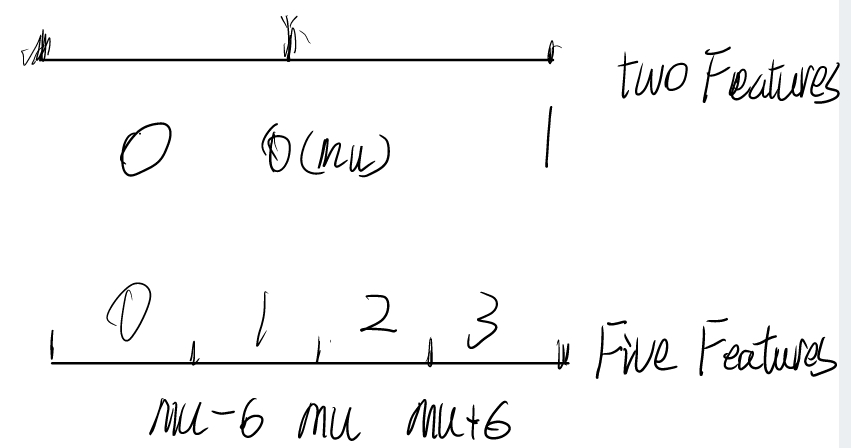
## 之前设置的是以0为分隔点，将正负收益分隔成2个区间，用0和1代表，中间的间隔点是0(也是mu平均数，一正一负，随机分布的正态分布)，Digitized Features就是设定了5个点，分隔成4部分，中间那个点就是mu平均数(计算returns的平均数)，然后往两边一个单位就是一个σ标准差的距离。

In [129]:
mu = data['returns'].mean()  
v = data['returns'].std()  

In [130]:
bins = [mu - v, mu, mu + v]  
bins  

[-0.006033537040418664, -0.00010174015279231288, 0.005830056734834038]

## bins定义了3个分隔点。分出4段

In [131]:
data

,EUR=,returns,direction,lag_1,lag_2,lag_3,lag_4,lag_5,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin,pos_log_reg,pos_gauss_nb,pos_svm,stratlog_reg,stratgauss_nb,stratsvm
Date,,,,,,,,,,,,,,,,,,,
2010-01-12,1.4494,-0.001310,-1.0,0.006984,0.006544,-0.006544,0.003058,-0.002988,1,1,0,1,0,-1.0,-1.0,1.0,0.001310,0.001310,-0.001310
2010-01-13,1.4510,0.001103,1.0,-0.001310,0.006984,0.006544,-0.006544,0.003058,0,1,1,0,1,1.0,1.0,1.0,0.001103,0.001103,0.001103
2010-01-14,1.4502,-0.000551,-1.0,0.001103,-0.001310,0.006984,0.006544,-0.006544,1,0,1,1,0,-1.0,-1.0,-1.0,0.000551,0.000551,0.000551
2010-01-15,1.4382,-0.008309,-1.0,-0.000551,0.001103,-0.001310,0.006984,0.006544,0,1,0,1,1,1.0,1.0,1.0,-0.008309,-0.008309,-0.008309
2010-01-19,1.4298,-0.005858,-1.0,-0.008309,-0.000551,0.001103,-0.001310,0.006984,0,0,1,0,1,1.0,1.0,1.0,-0.005858,-0.005858,-0.005858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,1.1702,0.004024,1.0,0.004644,0.002676,-0.001555,-0.002930,0.001291,1,1,0,0,1,-1.0,-1.0,1.0,-0.004024,-0.004024,0.004024
2018-06-26,1.1645,-0.004883,-1.0,0.004024,0.004644,0.002676,-0.001555,-0.002930,1,1,1,0,0,-1.0,-1.0,-1.0,0.004883,0.004883,0.004883
2018-06-27,1.1552,-0.008018,-1.0,-0.004883,0.004024,0.004644,0.002676,-0.001555,0,1,1,1,0,-1.0,-1.0,1.0,0.008018,0.008018,-0.008018


In [132]:
create_bins(data, bins)
#def create_bins(data, bins=[0]):
#    global cols_bin
#    cols_bin = []
#    for col in cols:
#        col_bin = col + '_bin'
#        data[col_bin] = np.digitize(data[col], bins=bins)  
#        cols_bin.append(col_bin)

## create_bins里面bins的[]从单个的0变成了mu - v, mu, mu + v这3个点。
## 前面的5个features是选择了延后5期的报酬率，做的01分类，后面进行细化，将原本的正负2个区间，变成了5个区间。Digitized Features就是更加细致化的features, 也是分区编码后的features。
## 之前因为是2个features，所以直接对应0和1两个bins, 尽管这个分隔点不准确，是预估出的一正一负平均值取0，但是思想是一致的，因为有2个features，所以就对returns的值分2份，现在变成有5个features就对returns分5份，看每一份延期收益属于分出的0123这4个区域里面的哪一个(frequency approach)。实际上就是features之间的对应关系，做单纯的01分类也可以，之前的bin就是01分类。

In [133]:
data[cols_bin].head()

,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin
Date,,,,,
2010-01-12,3,3,0,2,1
2010-01-13,1,3,3,0,2
2010-01-14,2,1,3,3,0
2010-01-15,1,2,1,3,3
2010-01-19,0,1,2,1,3


In [134]:
fit_models(data)
#def fit_models(data):  
#    mfit = {model: models[model].fit(data[cols_bin], data['direction'])
#            for model in models.keys()} 

In [135]:
derive_positions(data)
#def derive_positions(data):  
#    for model in models.keys():
#        data['pos_' + model] = models[model].predict(data[cols_bin])

In [136]:
evaluate_strats(data)
#def evaluate_strats(data):  
#    global sel
#    sel = []
#    for model in models.keys():
#        col = 'strat' + model 
#        data[col] = data['pos_' + model] * data['returns']
#        sel.append(col)
#    sel.insert(0, 'returns')

In [137]:
data[sel].sum().apply(np.exp)

returns          0.805002
stratlog_reg     1.431120
stratgauss_nb    1.815304
stratsvm         7.165290
dtype: float64

## 看的出来，这种细分的确是有用的，3种的收益都有明显的提升，从预测成功率来看，也是有明显的增加。

In [138]:
(data['direction'] == data['pos_log_reg']).mean()

0.5215759849906192

In [139]:
(data['direction'] == data['pos_svm']).mean()

0.5881801125703565

In [140]:
(data['direction'] == data['pos_gauss_nb']).mean()

0.524859287054409

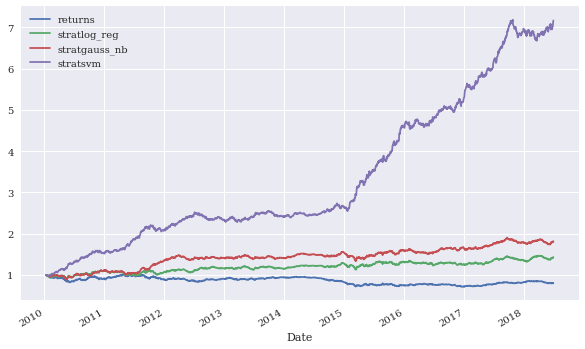

In [141]:
data[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_ml_09.png')

## 线图上看SVM策略的累计收益已经增幅达到了45度线的水平了。

## Sequential Train-Test Split

https://github.com/blue-yonder/tsfresh
## TSFRESH通过自动提取特征来节省您花在构建特征上的时间。
## 为了避免提取不相关的特征，TSFRESH包有一个内置的过滤程序。此过滤程序评估每个特征对手头的回归或分类任务的解释能力和重要性。自动提取数百个特征
## 赚钱的features使用的是lag出的延后收益，但是实际上很多价格相关的市场信息都可以作为features，这就是一个Github的程序，用来萃取出finance数据中有用的features。

In [142]:
split = int(len(data) * 0.5)

In [143]:
train = data.iloc[:split].copy()  

## 形成test set测试集，取出一半，.copy()，取出的数据和原数据没有后续的关联性，后续原数据再怎么变化都会影响copy。

In [144]:
fit_models(train)  
#def fit_models(data):  
#    mfit = {model: models[model].fit(data[cols_bin], data['direction'])
#            for model in models.keys()} 

In [145]:
test = data.iloc[split:].copy()  

## 前半截数据作为train，后半截数据作为test，train用来fit，后面的predict相关的操作用test数据集。这样是一种用来处理/测试过拟合的方法。(模型拟合当中的通常做法)
## def程序的引入可以让代码更加有结构性。

In [146]:
derive_positions(test)  
#def derive_positions(data):  
#    for model in models.keys():
#        data['pos_' + model] = models[model].predict(data[cols_bin])

In [147]:
evaluate_strats(test)  
#def evaluate_strats(data):  
#    global sel
#    sel = []
#    for model in models.keys():
#        col = 'strat' + model 
#        data[col] = data['pos_' + model] * data['returns']
#        sel.append(col)
#    sel.insert(0, 'returns')

In [148]:
test[sel].sum().apply(np.exp)

returns          0.850291
stratlog_reg     0.952898
stratgauss_nb    0.941172
stratsvm         1.020519
dtype: float64

In [149]:
test

,EUR=,returns,direction,lag_1,lag_2,lag_3,lag_4,lag_5,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin,pos_log_reg,pos_gauss_nb,pos_svm,stratlog_reg,stratgauss_nb,stratsvm
Date,,,,,,,,,,,,,,,,,,,
2014-04-08,1.3794,0.003922,1.0,0.002769,-0.001167,-0.003493,-0.001887,0.001596,2,1,1,1,2,1.0,1.0,1.0,0.003922,0.003922,0.003922
2014-04-09,1.3855,0.004412,1.0,0.003922,0.002769,-0.001167,-0.003493,-0.001887,2,2,1,1,1,1.0,1.0,1.0,0.004412,0.004412,0.004412
2014-04-10,1.3887,0.002307,1.0,0.004412,0.003922,0.002769,-0.001167,-0.003493,2,2,2,1,1,1.0,1.0,-1.0,0.002307,0.002307,-0.002307
2014-04-11,1.3883,-0.000288,-1.0,0.002307,0.004412,0.003922,0.002769,-0.001167,2,2,2,2,1,1.0,1.0,1.0,-0.000288,-0.000288,-0.000288
2014-04-14,1.3818,-0.004693,-1.0,-0.000288,0.002307,0.004412,0.003922,0.002769,1,2,2,2,2,-1.0,-1.0,1.0,0.004693,0.004693,-0.004693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,1.1702,0.004024,1.0,0.004644,0.002676,-0.001555,-0.002930,0.001291,2,2,1,1,2,1.0,1.0,1.0,0.004024,0.004024,0.004024
2018-06-26,1.1645,-0.004883,-1.0,0.004024,0.004644,0.002676,-0.001555,-0.002930,2,2,2,1,1,1.0,1.0,-1.0,-0.004883,-0.004883,0.004883
2018-06-27,1.1552,-0.008018,-1.0,-0.004883,0.004024,0.004644,0.002676,-0.001555,1,2,2,2,1,1.0,1.0,1.0,-0.008018,-0.008018,-0.008018


In [150]:
test = pd.DataFrame(test)

## 结果上看，有明显的下滑，说明之前的train的时候就已经出现overfitting(过拟合)的情况，使用原本用来train的数据还能够获得一个不错，甚至极好的水平(SVM); 但是当使用没有参与train过程的test数据集的时候，明显predict的结果就很惨不忍睹了，除了SVM在1以上(算上手续费也是亏钱)，其他都是在亏钱。

In [151]:
(train['direction'] == train['pos_log_reg']).mean()

0.525328330206379

In [152]:
(train['direction'] == train['pos_svm']).mean()

0.5778611632270169

In [153]:
(train['direction'] == train['pos_gauss_nb']).mean()

0.5337711069418386

In [154]:
(test['direction'] == test['pos_log_reg']).mean()

0.48874296435272047

In [155]:
(test['direction'] == test['pos_svm']).mean()

0.5037523452157598

In [156]:
(test['direction'] == test['pos_gauss_nb']).mean()

0.49343339587242024

## 从平均值上看，在train组当中的预测准确率还是挺高的，但是到了test组的计算(因为模型是用train组数据得出的，所以虽然两个数据都是来自于test数据集，但是已经起到了交叉检验的作用)，数据上就惨不忍睹了，除了SVM，另外两个模型的预测准确率都低于0.5了，基本上意味着模型的作用很差。

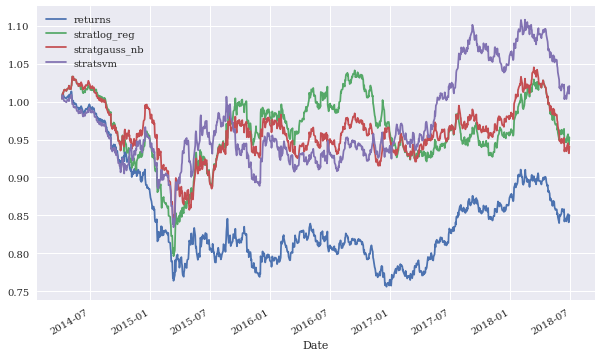

In [157]:
test[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_ml_10.png');

## 从图中看，原来SVM近乎于45度的上升直线基本上变成了跟随returns波动的平缓的折线。

## Randomized Train-Test Split

## 前面为了测试，选择的是将数据集切成2份：train，test；下面进一步，提出了更加严谨的检测方式，随机抽取test数据集，也是对半分，但是不一定是前0.5和后0.5。
## 但是这种测试基本上也是数理上的测试，所以对于实务当中的情况是没有的作用，因为不可能跨越天数来抽取用来测试的数据，按照时间序列，收益的获得是需要当前时间的价格和前一天的价格(实务当中还是选之前的数据进行回测更加实际可行)。

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
train, test = train_test_split(data, test_size=0.5,
                               shuffle=True, random_state=100)

## train_test_split是sklearn里面用来分隔数据集的函数，(数据，test_size=0.5测试集占总数据集的百分比，shuffle=True是放回式抽取(每次抽取后放回，然后对总数据集重新洗牌，然后再抽取)，random_state=100相当于是random_seed，确保随机抽取结果的一致性。)

In [160]:
train = train.copy().sort_index()  

## .sort_index()是按照index的大小次序排列(抽取的时候是随机抽取，所以次序已经打乱了)

In [161]:
train[cols_bin].head()

,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin
Date,,,,,
2010-01-12,3,3,0,2,1
2010-01-13,1,3,3,0,2
2010-01-14,2,1,3,3,0
2010-01-15,1,2,1,3,3
2010-01-20,1,0,1,2,1


## 看得出来从15号跳到20号

In [162]:
test = test.copy().sort_index()  

In [163]:
fit_models(train)
#def fit_models(data):  
#    mfit = {model: models[model].fit(data[cols_bin], data['direction'])
#            for model in models.keys()} 

In [164]:
derive_positions(test)
#def derive_positions(data):  
#    for model in models.keys():
#        data['pos_' + model] = models[model].predict(data[cols_bin])

In [165]:
evaluate_strats(test)
#def evaluate_strats(data):  
#    global sel
#    sel = []
#    for model in models.keys():
#        col = 'strat' + model 
#        data[col] = data['pos_' + model] * data['returns']
#        sel.append(col)
#    sel.insert(0, 'returns')

## 还是带入拟合，拟合用train，测试/predict用test。

In [166]:
test[sel].sum().apply(np.exp)

returns          0.878078
stratlog_reg     0.807238
stratgauss_nb    0.765009
stratsvm         0.730141
dtype: float64

## 从结果上看，这几个策略都是巨大的跌落，都是严重亏损，而且都低于了returns的值，说明在这种随机抽样的测试情况下，报酬率结果是非常差的。

In [167]:
(train['direction'] == train['pos_log_reg']).mean()

0.4981238273921201

In [168]:
(train['direction'] == train['pos_gauss_nb']).mean()

0.5093808630393997

In [169]:
(train['direction'] == train['pos_svm']).mean()

0.5863039399624765

In [170]:
(test['direction'] == test['pos_gauss_nb']).mean()

0.2954971857410882

In [171]:
(test['direction'] == test['pos_svm']).mean()

0.46904315196998125

In [172]:
(test['direction'] == test['pos_log_reg']).mean()

0.48405253283302063

## 这种train集合test集之间的差距拉大了，train数据集的结果基本上和上面一致，只不过采用的抽样方式不同，得出的最好的结果和之前不一样；但是test集的结果就非常差了，最低的gauss_nb的结果已经到了0.2954971857410882，其他两个也在0.5之下。
## 从报酬率角度看，最低报酬率的是SVM，但是最低的预测成功率是在gauss_nb上。

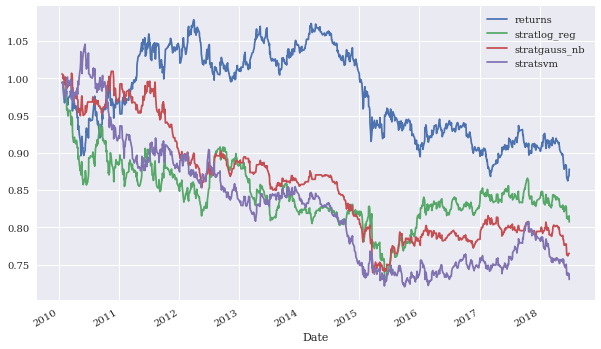

In [173]:
test[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_ml_11.png');

## 最后一张图更多的是警示作用，之前在没有引入test检测时获得的收益率是非常高的，但是做过一系列的检测之后，可以得出，之前的高收益是overfiting的情况，在实务当中，这种策略的结果都是悲剧的。

# Deep Neural Network

## DNN with scikit-learn

## 深度神经学习，sklearn的DNN是比较基础的，没办法做一些复杂的应用。
## MLPClassifier是Multilayer Perceptron多层感知器，是一种前向结构的 人工神经网络 ，映射一组输入向量到一组输出向量(所以是监督算法)。MLP可以被看作是一个有向图，由多个的节点层所组成，每一层都全连接到下一层。 除了输入节点，每个节点都是一个带有非线性激活函数的神经元(或称处理单元)。 
## 多层感知器遵循人類神經系統原理，學習並進行數據預測。 它首先學習，然後使用權重存儲數據，並使用算法來調整權重並減少訓練過程中的偏差，即實際值和預測值之間的誤差。 主要優勢在於其快速解決複雜問題的能力。

In [174]:
from sklearn.neural_network import MLPClassifier

## slover就是权重优化的求解器，{‘lbfgs’，‘sgd’，‘adam’}，默认’adam’。'lbfgs’是准牛顿方法族的优化器；'sgd’指的是随机梯度下降。'adam’是基于随机梯度的优化器。
## 默认解算器“adam”在相对较大的数据集（包含数千个训练样本或更多）方面在训练时间和验证分数方面都能很好地工作。但是，对于小型数据集，“lbfgs”可以更快地收敛并且表现更好(提出早的方法)。
## alpha就是L2惩罚(正则化项)参数λ, 默认为0.0001。
## hidden_layer_sizes是第i个元素表示第i个隐藏层中的神经元数量。2 * [250]代表2层隐藏层，每一层有250个隐藏神经元。也被写作[250, 250].
## random_state=1，因为模型构建当中存在随机抽取的情况，固定random_state可以确保结果的一致。

In [175]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=2 * [250], random_state=1)

In [176]:
data[cols_bin]

,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin
Date,,,,,
2010-01-12,3,3,0,2,1
2010-01-13,1,3,3,0,2
2010-01-14,2,1,3,3,0
2010-01-15,1,2,1,3,3
2010-01-19,0,1,2,1,3
...,...,...,...,...,...
2018-06-25,2,2,1,1,2
2018-06-26,2,2,2,1,1
2018-06-27,1,2,2,2,1


In [177]:
%time model.fit(data[cols_bin], data['direction'])

Wall time: 6.19 s


MLPClassifier(alpha=1e-05, hidden_layer_sizes=[250, 250], random_state=1,
              solver='lbfgs')

## 这里面的cols_bin是来自于之前做digitized features时将returns分为5份的结果。这里面没有使用之前def的一整套函数式，直接使用的是.fit/predict。

In [178]:
data['pos_dnn_sk'] = model.predict(data[cols_bin])

In [179]:
data['strat_dnn_sk'] = data['pos_dnn_sk'] * data['returns']

In [180]:
data[['returns', 'strat_dnn_sk']].sum().apply(np.exp)

returns          0.805002
strat_dnn_sk    40.195400
dtype: float64

## 这个收益结果对于汇率市场，在不加杠杆的情况下就非常夸张，因为这意味着之前的1块钱变成了40块钱，这是股票市场也没有做到过的报酬率, 尤其是returns的值还是1块钱跌到0.8的跌市。

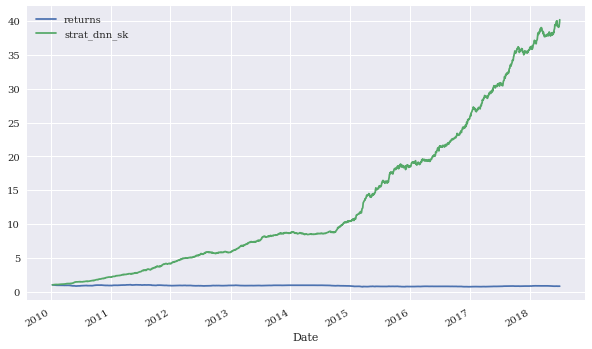

In [181]:
data[['returns', 'strat_dnn_sk']].cumsum().apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_ml_12.png');

## 这个累加报酬率比之前夸张的SVM45度上涨报酬率还要夸张，因为跨度太大，直接导致下面的returns的折线因为比例尺的变化而变成了一条直线。

In [182]:
(data['direction'] == data['pos_dnn_sk']).mean()

0.6810506566604128

## 从预测成功率0.6810506566604128来看也是做到极高的水平了。

## 因为上面的结果太过于超出人的常识，所以下面就用cross validation的想法来验证一下。
## 可以是手动分成2部分；也可以是更加严谨的，通过sklearn里面的train_test_split函数来切分数据集，就是下面进行的。

In [183]:
train, test = train_test_split(data, test_size=0.5, random_state=100)

In [184]:
train = train.copy().sort_index()

In [185]:
test = test.copy().sort_index()

## 随机选出的数据组成train和test，然后每个都做.sort_index()排序。

In [186]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=500,
                     hidden_layer_sizes=3 * [500], random_state=1)  

In [187]:
%time model.fit(train[cols_bin], train['direction'])

Wall time: 50.2 s


MLPClassifier(alpha=1e-05, hidden_layer_sizes=[500, 500, 500], max_iter=500,
              random_state=1, solver='lbfgs')

## 相比之前的fit，尽管train的数据减少了一半，但是在其他参数没有改变的前提下，隐藏层的数量从2层变成了3层，意味着多加了250个神经元。所以运行的时间也要多几十倍的时间，因为路径的个数直接乘以了250。

In [188]:
test['pos_dnn_sk'] = model.predict(test[cols_bin])

## 更改pos_dnn_sk内容为train和test这个调整过后得到的预测结果，可以预测的是pos_dnn_sk做出的returns会相比之前的40倍收益要低很多。

In [189]:
test['strat_dnn_sk'] = test['pos_dnn_sk'] * test['returns']

In [190]:
test[['returns', 'strat_dnn_sk']].sum().apply(np.exp)

returns         0.878078
strat_dnn_sk    1.121694
dtype: float64

## 这个报酬率结果就比较正常了：1.2(因为DNN存在随机性，之前也算出过6.515300的收益，相当于是6倍的报酬率，还是相当高的)，和之前的40倍相比这个结果更符合实务当中做出的报酬率，也说明的第一次DNN的时候有严重的overfitting过拟合。 

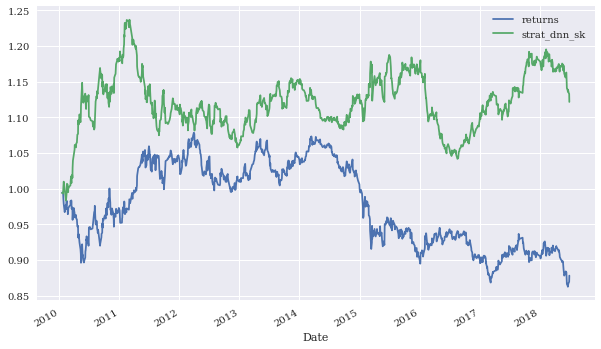

In [191]:
test[['returns', 'strat_dnn_sk']].cumsum().apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_ml_13.png');

In [192]:
(train['direction'] == train['pos_dnn_sk']).mean()

0.6707317073170732

In [193]:
(test['direction'] == test['pos_dnn_sk']).mean()

0.4981238273921201

## 预测成功率还是有明显的下降，在test数据集上，train的结果还是很高，说明了overfitting的存在。

## DNN with Keras & TensorFlow Backend

## 相比sklearn, TF可以进行更加复杂的DNN拟合。

In [194]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

## 下面是在tf2.0之前版本的全函数式，从训练模型到求结果，再得出收益和预测的准确性，最后对结果可视化。然后发现仍然存在过拟合的情况，下面就是应用之前应用过的train_test_split分出的train和test数据集，对用train数据集拟合出的模型带入test数据集测试效果(收益和预测的准确性).

### tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
### fc = [tf.contrib.layers.real_valued_column('lags',dimension = lags )]train_test_split
### model = tf.contrib.learn.DNNClassifier(hidden_units=3 * [500], _classes=len(bins) + 1, ture_columns=fc)
### 设置模型，模型的架构是3 * 500个神经元，分成5类。
### def input_fn():
###     fc = {'lags': tf.constant(data[cols_bin].values)}
###     la = tf.constant(data['direction'].apply(lambda x: 0 if x < 0 else 1).values, shape=[data['direction'].size, 1])
###     return fc, la
### 设定fit的model的形式，返回一个用来装参数的fc和用来装被解释变量的la.
### %time model.fit(input_fn=input_fn, steps=500)
### 总共运行3 * 500 * 500次。
### model.evaluate(input_fn=input_fn, steps=1)
### 出结果，将model里面包括的解释参数调出来，同时因为需要访问这些内容，所以还需要再访问一次模型。
### pred = np.array(list(model.predict(input_fn=input_fn)))  
### pred[:10]
### array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0])
### 导出策略，需要先将结果list化，然后再做np.array。
### data['pos_dnn_tf'] = np.where(pred > 0, 1, -1)
### 0，1改成-1， 0， 1。
### data['strat_dnn_tf'] = data['pos_dnn_tf'] * data['returns']
### data[['returns', 'strat_dnn_tf']].sum().apply(np.exp)
### data[['returns', 'strat_dnn_tf']].cumsum().apply(np.exp).plot(figsize=(10, 6));
### 算returns，画图，表示累计收益。
### model = tf.contrib.learn.DNNClassifier(hidden_units=3 * [500], n_classes=len(bins) + 1, feature_columns=fc)
### data = train
### %time model.fit(input_fn=input_fn, steps=2500)
### data = test
### 切分成两份，train用来fit，test测试。train和test都是前面sklearn里面做的random抽取0.5。
### model.evaluate(input_fn=input_fn, steps=1)
### pred = np.array(list(model.predict(input_fn=input_fn)))
### test['pos_dnn_tf'] = np.where(pred > 0, 1, -1)
### test['strat_dnn_tf'] = test['pos_dnn_tf'] * test['returns']
### test[['returns', 'strat_dnn_sk', 'strat_dnn_tf']].sum().apply(np.exp)
### returns         0.878078，strat_dnn_sk    1.115826，strat_dnn_tf    1.071912：差距不大。
### test[['returns', 'strat_dnn_sk', 'strat_dnn_tf']].cumsum().apply(np.exp).plot(figsize=(10, 6));
### 算returns，画图，表示累计收益。

In [195]:
Dense?

## fc是用来定义神经网络的资料的容器, 但是因为tf2.0之后的版本取消了contrib模块，所以没有办法按照之前版本的方法做，tf2.0之后可以采用from keras.layers import Dense当中的Dense来设定每一层的神经元参数。

In [196]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## tf.logging.set_verbosity(tf.logging.ERROR) 是tf2.0之前的版本用来去除一些报错的语句(让tensorflow只将错误信息进行记录。)，2.0之后的版本改成了上面的语句。实际上，因为新版本，很多过去的bug都被改正过了，所以不加也不会影响程序运转。

In [197]:
lags

5

In [206]:
def create_model():
    np.random.seed(100)
    tf.random.set_seed(100)
    model = Sequential()
    model.add(Dense(16, activation='relu', input_dim=lags))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop',
                  metrics=['accuracy'])
    return model

In [207]:
tf.random.set_seed?

In [208]:
Dense?

## ————————————————————
## 对于dense函数当中的参数：

## 1，input_dim是规定输入的词语/features的数量

## 2，dense 当中的activation意思是激活函数，通过设定不同的激活函数，dense可以做到不同类型隐藏层的基础作用。tf.nn.relu = 'relu'就是修正线性单元，最流行的激活函数。一般隐藏层使用。主要缺陷是：输出不以0为中心，输入小于0时存在梯度消失问题(死亡relu)。
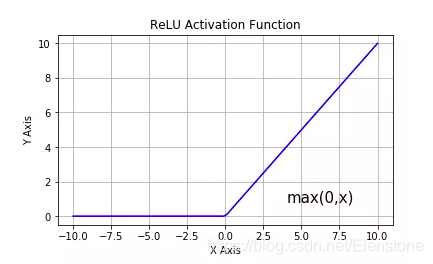
## activation='sigmoid'/tf.nn.sigmoid将实数压缩到0到1之间，一般只在二分类的最后输出层使用。 就是S曲线模型，也叫做生存曲线模型。主要缺陷为存在梯度消失问题，计算复杂度高，输出不以0为中心。
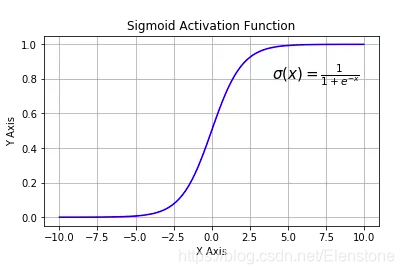

## ['激活函数的公式'](https://zhuanlan.zhihu.com/p/98863801)

## ['激活函数'](https://blog.csdn.net/Elenstone/article/details/105756624?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522162867981316780366532319%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=162867981316780366532319&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~baidu_landing_v2~default-4-105756624.pc_search_download_positive&utm_term=tensorflow2.0+activation&spm=1018.2226.3001.4187)

## ['激活函数的原理'](https://zhuanlan.zhihu.com/p/98472075)

## model.add(Dense(16, activation='relu', input_dim=lags))相当于是
## model.add(tf.keras.Input(shape=(lags5,)))
## model.add(tf.keras.layers.Dense(16, activation='relu'))
## —————————————————
## 对于compile()函数：
## 要使用训练模型fit()，需要使用compile()来指定一个损失函数、一个优化器以及一些要监控的可选指标。相对是在层的设立之后，在fit函数之前进行的一个设定，将上面有关fit的参数传递给模型。
## optimizer里面是字符串（优化器名称）或优化器实例。
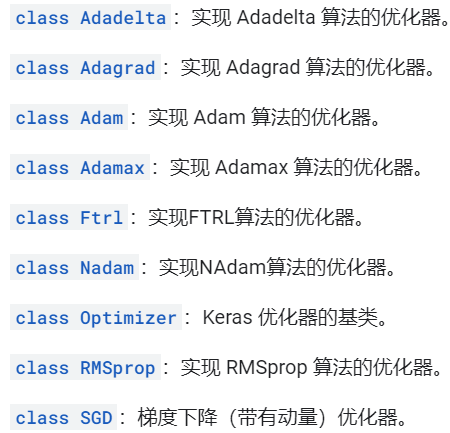
## loss：损失函数。可能是一个字符串（损失函数的名称），或者一个tf.keras.losses.Loss实例。损失函数是用来配置参数的，拟合的过程就是让loss函数值最小化的过程。
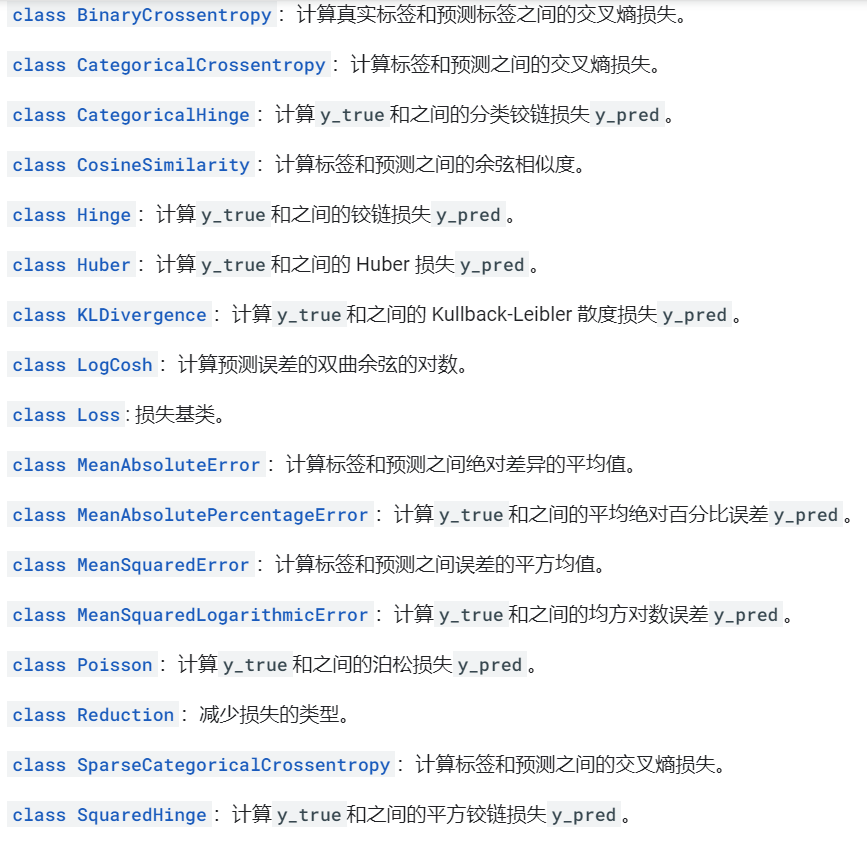
## 模型在训练和测试期间要评估的指标列表。每个都可以是字符串（内置函数的名称）、函数或tf.keras.metrics.Metric实例。['accuracy']如果用字符串，需要在外面加[]或多个指标的情况用dict{}.
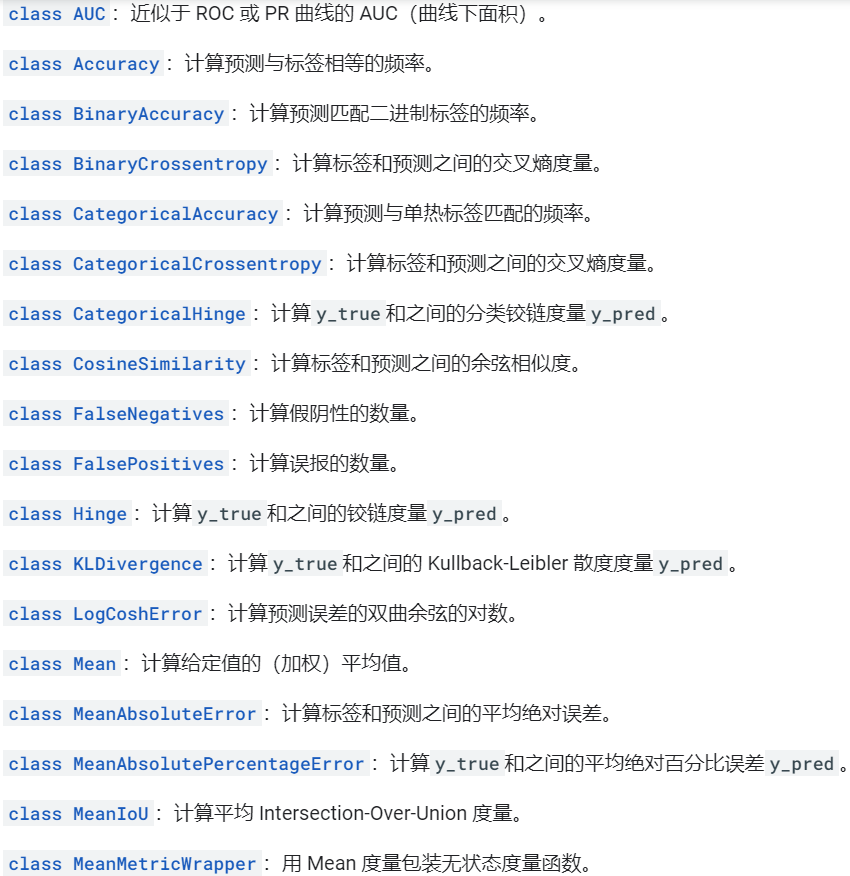
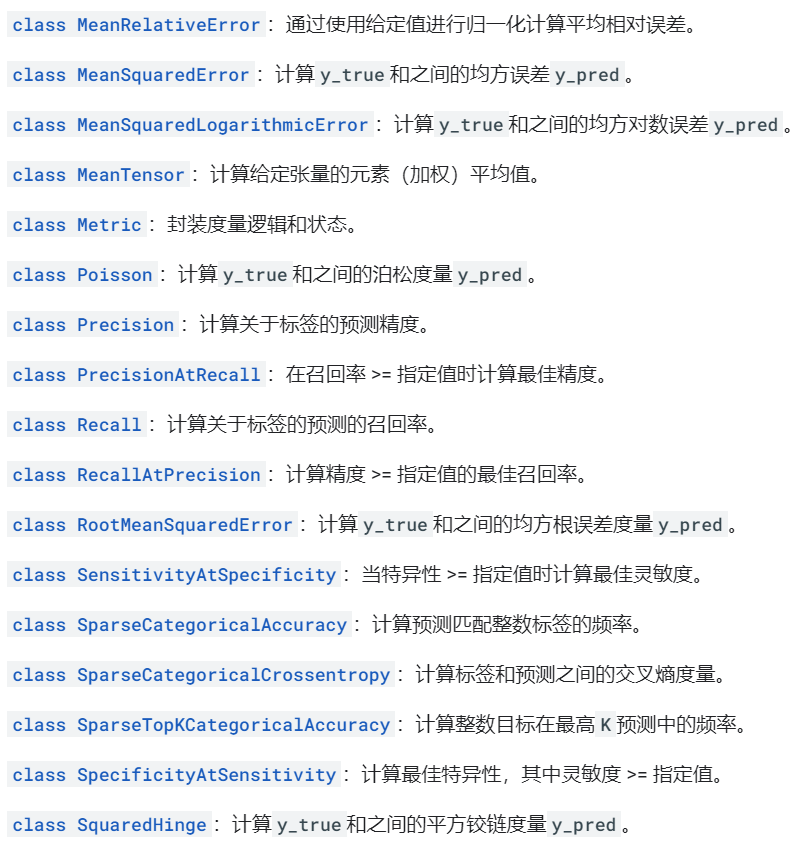
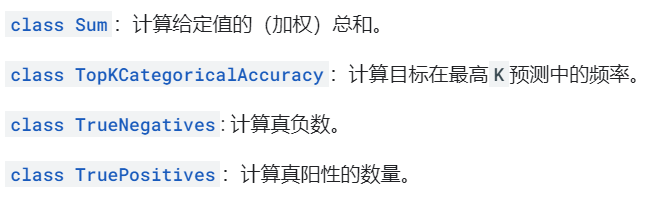
## 这就是DNN的灵活性，上述的很多参数对于别的模型都是固定的，但是对于DNN是可选/调的，因为理论上每一个神经元都可以是不同的模型，最终通过反馈，拟合出最优的模型，所以没有固定的fit的方法和模型的构建函数，所以需要自己搭建和设定。

## ————————————————
## 对于def create_model():模型：
## 用来设定model的形式，np.random.seed(100)固定随机抽取的结果，方便复现；tf.random.set_seed(100)设定全局随机种子global random seed，后面的所有抽乱数的情况都是在100这个随机种子之下的；
## Sequential()相当于t2.0之前设定的fc=[tf.contrib.layers.real_valued_column('lags',dimension = lags )]函数式，现在简化了，开出一个用来盛放模型和下属的隐藏层的model容器。
## layers下属很多层，比较常用的是dense，flatten，Embedding和Conv1D。
## keras.layers.Dense/Dense: Just your regular densely-connected NN layer（常规层), 这个全连接层封装了output = activation(tf.matmul(input, kernel) + bias)，其中，activation是用activation参数传递的逐元素激活函数，kernel是该层创建的权重矩阵，bias是由图层创建的偏差向量。最通用的隐藏层，可以通过改变activation达到专门名称隐藏层的简易效果，class ReLU相当于是activation = ‘relu’单独独立出来的可以进行更多设定的单独特殊层。
## Flatten(), 展平层，将tensor铺平为1阶向量，这个没有太多可介绍的，主要用于图像像素矩阵导入后，或Embedding后。
## Embedding, 嵌入层主要应用于推荐/NLP领域中，对于类别型特征的处理。由于计算机不能直接处理文本特征，不能直接计算类别型特征的欧氏距离。因此常见的方法是将类别型特征离散化，如One-Hot，LabelCoder等操作，将文本类别映射为高维稀疏的向量，如[0,0,0,1,…,0]等，但这种操作完全忽略了词与词之间的关联性，如[篮球，足球]和{篮球，小提琴]是完全等距离的，这对于挖掘相关性的算法而言是违背了设计初衷的，因此引入了Embedding的概念。
## Embedding，将高维稀疏的特征稠密化，映射为低维稠密的向量，且提供了词与词之间相关性计算的保障，可以通过优化器不断优化词于词之间的权重。
## Conv1D：1D convolution layer一维卷积层，比如temporal convolution时间卷积。
## 所以对于整个模型的构建来说，先是model = Sequential()开出容器，然后第一个dense设定输入信息的同时设定好了第一个隐藏层是16个神经元；model.add(Dense(16, activation='relu'))再加一个16个神经元的隐藏层，同样都是用relu激活函数
## 最后用来输出的隐藏层的激活模型activation：sigmoid，S曲线模型，运行一次，这一层只有一个unit神经元。
## 在搭建好模型架构之后，在fit之前，需要使用compile()来设定关于如何fit的参数，optimizer = 'rmsprop'代表使用RMSprop优化器；loss='binary_crossentropy'代表计算真实标签和预测标签之间的交叉熵损失；metrics=['accuracy']代表计算的指标是预测等于labels实际结果的准确率。

## [model的流程](https://www.tensorflow.org/api_docs/python/tf/keras/Model)

In [203]:
data_ = (data - data.mean()) / data.std()
data['direction_'] = np.where(data['direction'] == 1, 1, 0)

In [204]:
data

,EUR=,returns,direction,lag_1,lag_2,lag_3,lag_4,lag_5,lag_1_bin,lag_2_bin,...,lag_5_bin,pos_log_reg,pos_gauss_nb,pos_svm,stratlog_reg,stratgauss_nb,stratsvm,pos_dnn_sk,strat_dnn_sk,direction_
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-12,1.4494,-0.001310,-1.0,0.006984,0.006544,-0.006544,0.003058,-0.002988,3,3,...,1,1.0,-1.0,-1.0,-0.001310,0.001310,0.001310,-1.0,0.001310,0
2010-01-13,1.4510,0.001103,1.0,-0.001310,0.006984,0.006544,-0.006544,0.003058,1,3,...,2,-1.0,1.0,1.0,-0.001103,0.001103,0.001103,1.0,0.001103,1
2010-01-14,1.4502,-0.000551,-1.0,0.001103,-0.001310,0.006984,0.006544,-0.006544,2,1,...,0,-1.0,-1.0,-1.0,0.000551,0.000551,0.000551,-1.0,0.000551,0
2010-01-15,1.4382,-0.008309,-1.0,-0.000551,0.001103,-0.001310,0.006984,0.006544,1,2,...,3,1.0,1.0,1.0,-0.008309,-0.008309,-0.008309,-1.0,0.008309,0
2010-01-19,1.4298,-0.005858,-1.0,-0.008309,-0.000551,0.001103,-0.001310,0.006984,0,1,...,3,1.0,-1.0,-1.0,-0.005858,0.005858,0.005858,-1.0,0.005858,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,1.1702,0.004024,1.0,0.004644,0.002676,-0.001555,-0.002930,0.001291,2,2,...,2,1.0,1.0,1.0,0.004024,0.004024,0.004024,1.0,0.004024,1
2018-06-26,1.1645,-0.004883,-1.0,0.004024,0.004644,0.002676,-0.001555,-0.002930,2,2,...,1,-1.0,-1.0,-1.0,0.004883,0.004883,0.004883,-1.0,0.004883,0
2018-06-27,1.1552,-0.008018,-1.0,-0.004883,0.004024,0.004644,0.002676,-0.001555,1,2,...,1,1.0,1.0,-1.0,-0.008018,-0.008018,0.008018,-1.0,0.008018,0


## 先对于data里面的每一列标准化(lag_1全部变成了0到1的数据)，尤其是最后的输出层的sigmoid，S生存曲线是在0到1之间，0.5作为分界线；然后增加一列'direction_'将数据变成01，方便后面机器计算。

In [209]:
model = create_model()

In [218]:
%%time
model.fit(data[cols], data['direction_'],
          epochs=50, verbose=0)

Wall time: 5.43 s


## fit时间很短，输入的数据是data['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']； 被解释变量(监督值)是data['direction_']；1个epoch指用训练集中的全部样本训练一次，epochs=50是指训练50次取最优结果；verbose=False，有'auto'、0、1和2这4个。0 = 无声，1 = 进度条progress bar，2 = 每个 epoch 一行。'auto' 在大多数情况下默认为 1，但切换成2当ParameterServerStrategy的时候. 默认就是False是0, 也就是不显示之间的所有过程，直接显示一个结果.

In [213]:
model.evaluate(data_[cols], data['direction_'])

67/67 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.6004


[0.6539651155471802, 0.600375235080719]

## 返回模型在测试模式下的损失值the loss value和指标值metrics values。这两个值和前面compile()设置的有关,metrics values可能会不是一个，会是一组指标{}。

In [214]:
pred = np.where(model.predict(data_[cols]) > 0.5, 1, 0) 
pred[:10].flatten()

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0])

In [217]:
model.predict(data_[cols])

array([[0.5395642 ],
       [0.56233954],
       [0.44306892],
       ...,
       [0.42571676],
       [0.50924015],
       [0.56389725]], dtype=float32)

## model.predict出结果，输入data_[cols]就是x/样本值(因为这个没有分train和test数据集，所以还是带入用来fit的一整个数据集)。
## 输出结果是在0.5左右浮动的数组，predict的结果是跟着前面的样本值走的，不是和regression一样跟着监督值走的，所以用returns和direction理论上对于输出的predict是没有影响的。
## 结果不是正负数是因为之前为了最后输出的时候能够使用sigmoid进行过标准化，正负报酬率数据集变成了以0.5作为分隔的0到1的数组。
## 所以通过np.where再将数据转回来，变成01，方便下一步做出策略。

In [219]:
data['pos_dnn_ke'] = np.where(pred > 0, 1, -1)  

## 增加一列data['pos_dnn_ke']通过np.where将01改成-1,1，代表多空位置|。

In [220]:
data['strat_dnn_ke'] = data['pos_dnn_ke'] * data['returns']

In [221]:
data[['returns', 'strat_dnn_ke']].sum().apply(np.exp)

returns         0.805002
strat_dnn_ke    6.776225
dtype: float64

## 求收益，看得出收益是很夸张的接近7倍

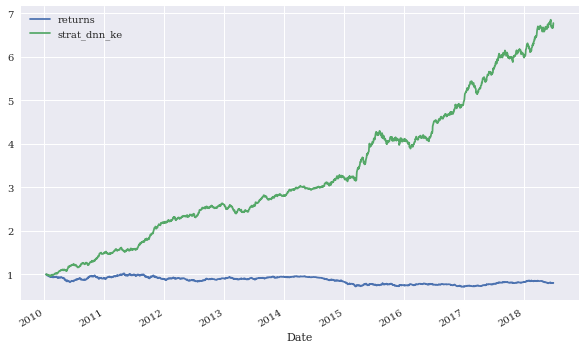

In [222]:
data[['returns', 'strat_dnn_ke']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_ml_14.png');

## 画图，累计收益基本上是45度线。

In [223]:
mu, std = train.mean(), train.std()

In [224]:
train_ = (train - mu) / mu.std()

In [225]:
model = create_model()

In [226]:
train['direction_'] = np.where(train['direction'] > 0, 1, 0)

In [227]:
%%time
model.fit(train_[cols], train['direction_'],
          epochs=50, verbose=False)

Wall time: 3.13 s


## 训练的时候计算出train的mean和标准差，方便后面test的时候能够完成同步的标准化，标准化之后的数据就是在01之间的以0.5来分正负的数据。
## 上面使用的train和下面使用的test是之前使用train_test_split按照随机抽取的方式抽出的对半的train和test数据集。

In [228]:
test_ = (test - mu) / std

In [229]:
test['direction_'] = np.where(test['direction'] > 0, 1, 0)

In [230]:
model.evaluate(test_[cols], test['direction_'])

34/34 [==============================] - 0s 1ms/step - loss: 1.1572 - accuracy: 0.4878


[1.15716552734375, 0.4878048896789551]

## 0.6539651155471802, 0.600375235080719是之前的loss和accuracy值，相比之下，通过划分train和test的检测，loss损失较大增加0.65变成1.15，同时accuracy极大降低0.6变成0.48.

In [231]:
pred = np.where(model.predict(test_[cols]) > 0.5, 1, 0) 
pred[:10].flatten()

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [232]:
test['pos_dnn_ke'] = np.where(pred > 0, 1, -1)

In [233]:
test['strat_dnn_ke'] = test['pos_dnn_ke'] * test['returns']

In [234]:
test[['returns', 'strat_dnn_sk', 'strat_dnn_ke']].sum().apply(np.exp)

returns         0.878078
strat_dnn_sk    1.121694
strat_dnn_ke    0.991476
dtype: float64

## 同样的算出报酬率，相比之前的接近于7倍的报酬率，cross validation之后的报酬率下降十分明显，直接跌到了0.99，小于1，还是亏损状态，存在严重overfitting
## 相比之下sklearn的报酬率比TF的还要高一些，说明模型的复杂度和模型的盈利能力是不相关的。

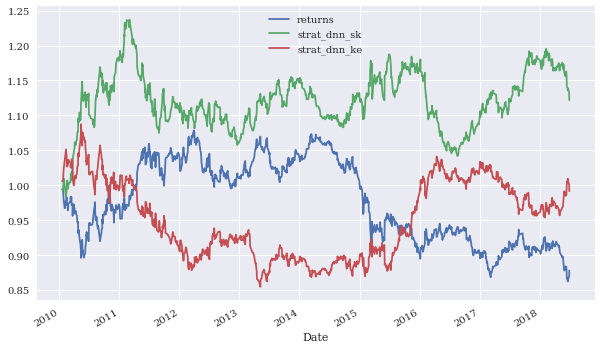

In [236]:
test[['returns', 'strat_dnn_sk', 'strat_dnn_ke']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_ml_15.png');

## 画图，这样的策略累计报酬率折线比较真实。

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>